### Makine Öğrenmesi ile Beyzbol Oyuncu Maaş Tahmini

**İş Problemi** 

Maaş bilgileri ve 1986 yılına ait kariyer istatistikleri paylaşılan beyzbol oyuncularının maaş tahminleri için bir makine öğrenmesi modeli geliştiriniz.

**Veri Seti Hikayesi** 

Bu veri seti orijinal olarak Carnegie Mellon Üniversitesi'nde bulunan StatLib kütüphanesinden alınmıştır. Veri seti 1988 ASA Grafik Bölümü Poster Oturumu'nda kullanılan verilerin bir parçasıdır. Maaş verileri orijinal olarak Sports Illustrated, 20 Nisan 1987'den alınmıştır. 1986 ve kariyer istatistikleri, Collier Books, Macmillan Publishing Company, New York tarafından yayınlanan 1987 Beyzbol Ansiklopedisi Güncellemesinden elde edilmiştir.

**Değişkenler** 

**AtBat:** 1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı

**Hits:** 1986-1987 sezonundaki isabet sayısı

**HmRun:** 1986-1987 sezonundaki en değerli vuruş sayısı

**Runs:** 1986-1987 sezonunda takımına kazandırdığı sayı

**RBI:** Bir vurucunun vuruş yaptığında koşu yaptırdığı oyuncu sayısı

**Walks:** Karşı oyuncuya yaptırılan hata sayısı

**Years:** Oyuncunun major liginde oynama süresi (sene)

**CAtBat:** Oyuncunun kariyeri boyunca topa vurma sayısı

**CHits:** Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı

**CHmRun:** Oyucunun kariyeri boyunca yaptığı en değerli sayısı

**CRuns:** Oyuncunun kariyeri boyunca takımına kazandırdığı sayı

**CRBI:** Oyuncunun kariyeri boyunca koşu yaptırdırdığı oyuncu sayısı

**CWalks:** Oyuncun kariyeri boyunca karşı oyuncuya yaptırdığı hata sayısı

**League:** Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör

**Division:** 1986 sonunda oyuncunun oynadığı pozisyonu gösteren E ve W seviyelerine sahip bir faktör

**PutOuts:** Oyun icinde takım arkadaşınla yardımlaşma

**Assits:** 1986-1987 sezonunda oyuncunun yaptığı asist sayısı

**Errors:** 1986-1987 sezonundaki oyuncunun hata sayısı

**Salary:** Oyuncunun 1986-1987 sezonunda aldığı maaş (bin üzerinden)

**NewLeague:** 1987 sezonunun başında oyuncunun ligini gösteren A ve N seviyelerine sahip bir faktör

#### Görev 1: Keşifçi Veri Analizi

**Adım 1:** Genel resmi inceleyiniz.

In [1]:
# Gerekli Kütüphane ve Fonksiyonların Kurulması

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, validation_curve

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import warnings
warnings.simplefilter("ignore")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.read_csv("datasets/hitters.csv")

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


In [2]:
df.shape

(322, 20)

In [3]:
df.isnull().sum() # Hedef değişkende, 59 tane NaN değer var.

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [4]:
df.describe().T # Veri setine ait betimsel istatistik değerlerine bakacak olursak;

,count,mean,std,min,25%,50%,75%,max
AtBat,322.000,380.929,153.405,16.000,255.250,379.500,512.000,687.000
Hits,322.000,101.025,46.455,1.000,64.000,96.000,137.000,238.000
HmRun,322.000,10.770,8.709,0.000,4.000,8.000,16.000,40.000
Runs,322.000,50.910,26.024,0.000,30.250,48.000,69.000,130.000
RBI,322.000,48.028,26.167,0.000,28.000,44.000,64.750,121.000
Walks,322.000,38.742,21.639,0.000,22.000,35.000,53.000,105.000
Years,322.000,7.444,4.926,1.000,4.000,6.000,11.000,24.000
CAtBat,322.000,2648.683,2324.206,19.000,816.750,1928.000,3924.250,14053.000
CHits,322.000,717.571,654.473,4.000,209.000,508.000,1059.250,4256.000
CHmRun,322.000,69.491,86.266,0.000,14.000,37.500,90.000,548.000


**Adım 2:** Numerik ve kategorik değişkenleri yakalayınız.

In [5]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    
    cat_cols    = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [6]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [7]:
cat_cols

['League', 'Division', 'NewLeague']

In [8]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [9]:
cat_but_car

[]

**Adım 3:** Numerik ve Kategorik değişkenlerin analizini yapınız.

In [10]:
# Kategorik Değişkenlerin Analizi

def cat_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)


        League  Ratio
League               
A          175 54.348
N          147 45.652
##########################################


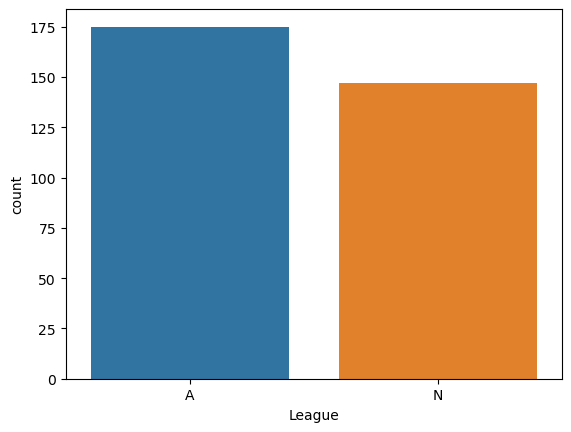

None
          Division  Ratio
Division                 
W              165 51.242
E              157 48.758
##########################################


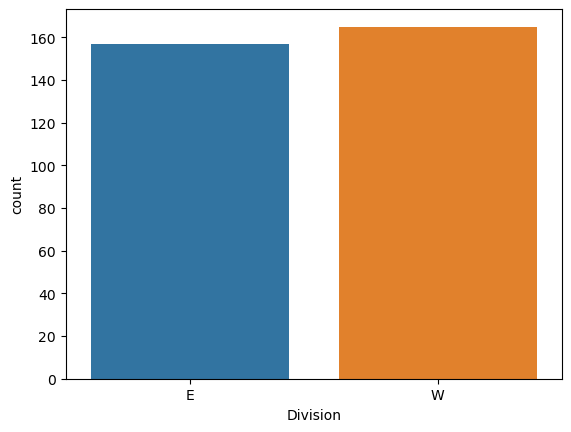

None
           NewLeague  Ratio
NewLeague                  
A                176 54.658
N                146 45.342
##########################################


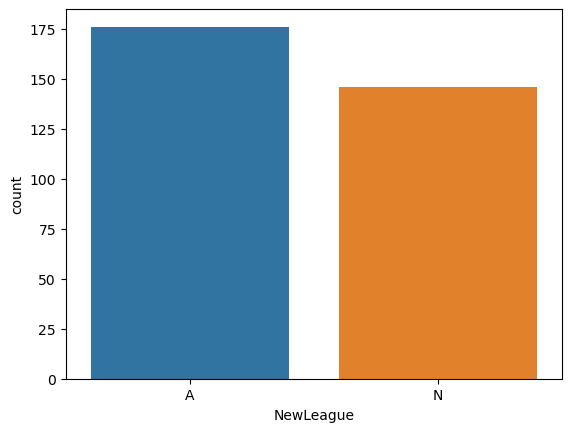

None


In [11]:
for col in cat_cols:
    print(cat_summary(df, col, plot = True))

In [12]:
# Numerik Değişkenlerin Analizi

def num_summary(dataframe, numerical_col, plot = False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins = 20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count   322.000
mean    380.929
std     153.405
min      16.000
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: AtBat, dtype: float64


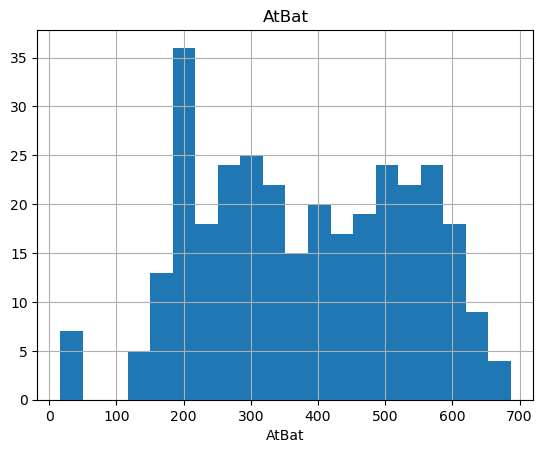

None
count   322.000
mean    101.025
std      46.455
min       1.000
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: Hits, dtype: float64


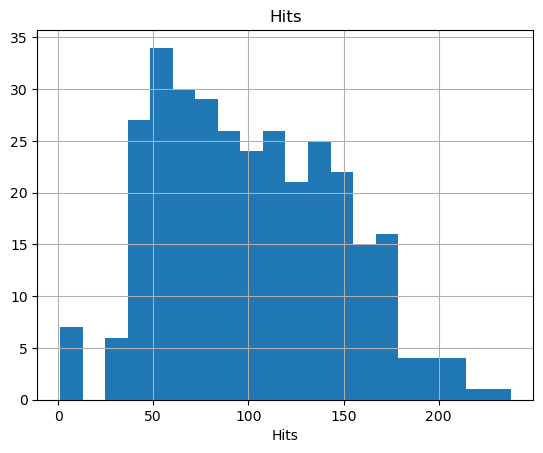

None
count   322.000
mean     10.770
std       8.709
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HmRun, dtype: float64


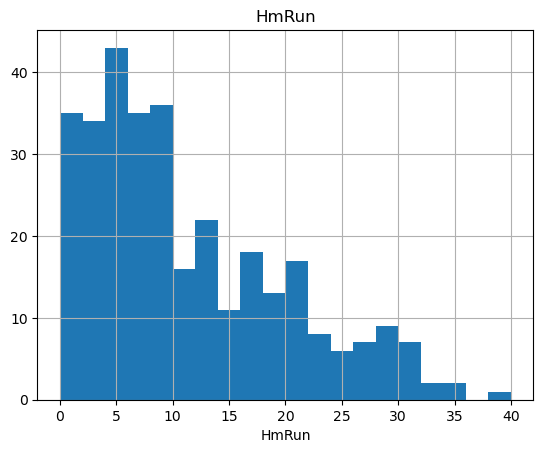

None
count   322.000
mean     50.910
std      26.024
min       0.000
5%       17.000
10%      20.100
20%      27.000
30%      33.000
40%      41.000
50%      48.000
60%      55.600
70%      66.000
80%      75.800
90%      89.000
95%      94.000
99%     107.790
max     130.000
Name: Runs, dtype: float64


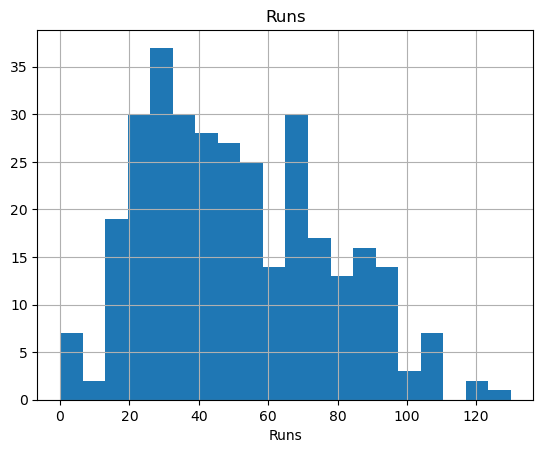

None
count   322.000
mean     48.028
std      26.167
min       0.000
5%       14.000
10%      19.000
20%      26.000
30%      30.000
40%      36.400
50%      44.000
60%      49.000
70%      58.000
80%      73.000
90%      86.000
95%      96.000
99%     112.370
max     121.000
Name: RBI, dtype: float64


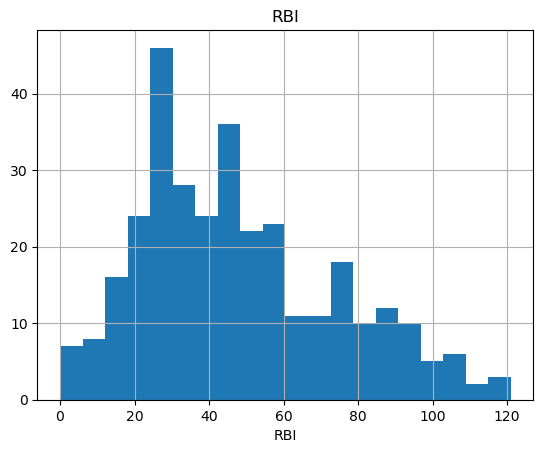

None
count   322.000
mean     38.742
std      21.639
min       0.000
5%       11.050
10%      15.000
20%      20.000
30%      24.000
40%      30.000
50%      35.000
60%      40.000
70%      48.700
80%      59.000
90%      69.900
95%      78.000
99%      93.580
max     105.000
Name: Walks, dtype: float64


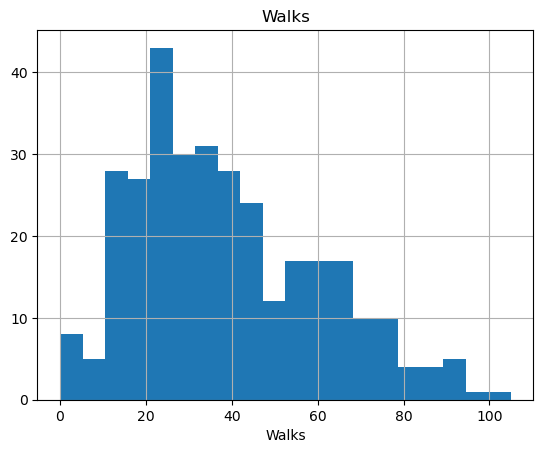

None
count   322.000
mean      7.444
std       4.926
min       1.000
5%        1.000
10%       2.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       7.600
70%      10.000
80%      12.000
90%      15.000
95%      17.000
99%      19.790
max      24.000
Name: Years, dtype: float64


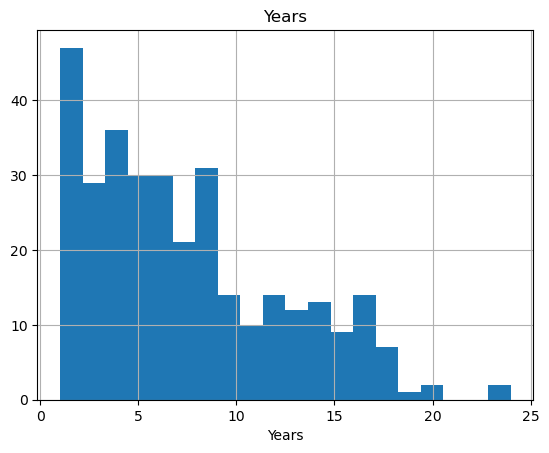

None
count     322.000
mean     2648.683
std      2324.206
min        19.000
5%        216.500
10%       342.200
20%       667.600
30%       963.400
40%      1402.200
50%      1928.000
60%      2654.000
70%      3365.000
80%      4483.000
90%      6123.400
95%      7125.600
99%      8749.970
max     14053.000
Name: CAtBat, dtype: float64


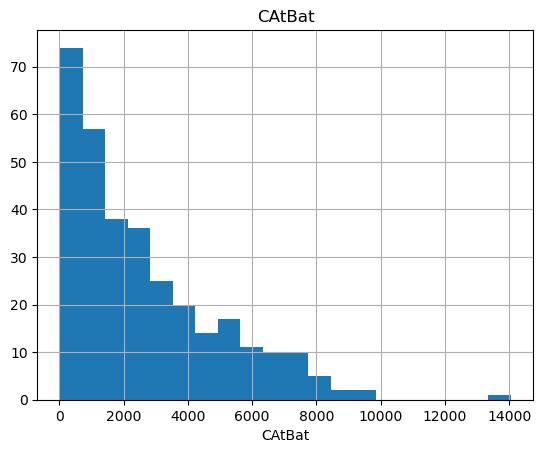

None
count    322.000
mean     717.571
std      654.473
min        4.000
5%        54.000
10%       86.000
20%      164.600
30%      238.000
40%      355.800
50%      508.000
60%      708.200
70%      911.100
80%     1229.200
90%     1659.600
95%     2017.150
99%     2500.340
max     4256.000
Name: CHits, dtype: float64


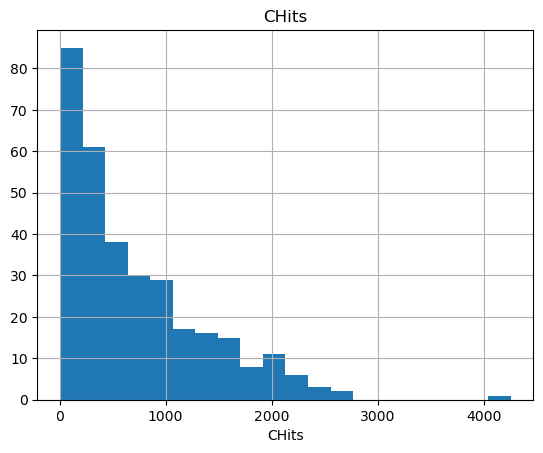

None
count   322.000
mean     69.491
std      86.266
min       0.000
5%        2.000
10%       4.000
20%      10.200
30%      16.300
40%      27.400
50%      37.500
60%      51.200
70%      72.400
80%     103.800
90%     194.900
95%     265.650
99%     373.120
max     548.000
Name: CHmRun, dtype: float64


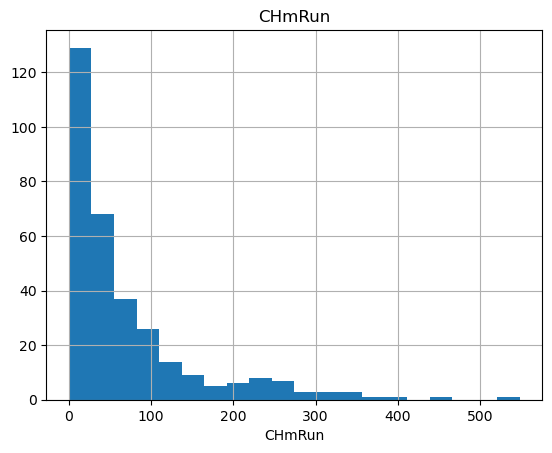

None
count    322.000
mean     358.795
std      334.106
min        1.000
5%        27.000
10%       38.100
20%       80.400
30%      117.300
40%      181.000
50%      247.000
60%      333.000
70%      443.400
80%      627.200
90%      895.700
95%     1032.300
99%     1174.370
max     2165.000
Name: CRuns, dtype: float64


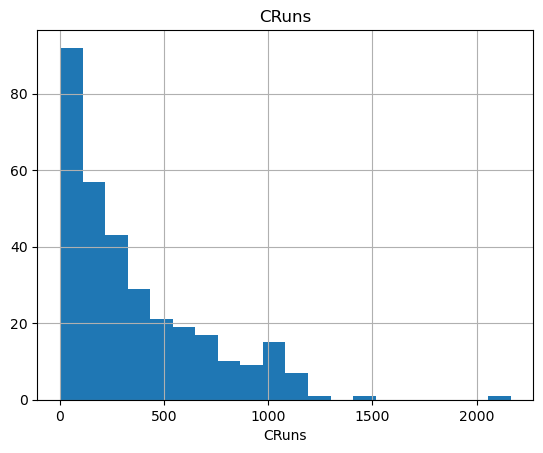

None
count    322.000
mean     330.118
std      333.220
min        0.000
5%        22.050
10%       34.100
20%       70.200
30%      106.300
40%      149.000
50%      220.500
60%      303.600
70%      379.100
80%      496.200
90%      861.600
95%     1071.750
99%     1310.850
max     1659.000
Name: CRBI, dtype: float64


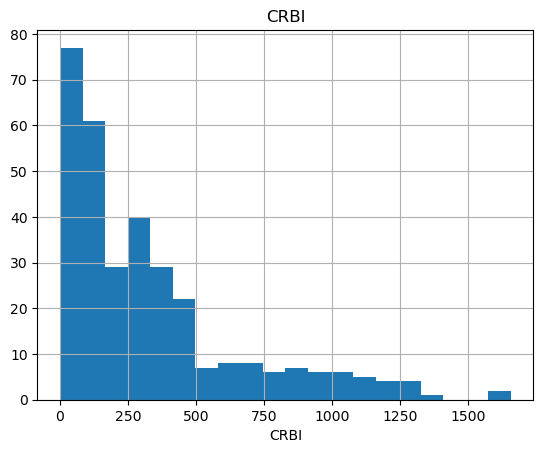

None
count    322.000
mean     260.239
std      267.058
min        0.000
5%        15.050
10%       30.100
20%       55.000
30%       82.000
40%      117.400
50%      170.500
60%      226.600
70%      300.700
80%      421.000
90%      643.900
95%      817.600
99%     1139.140
max     1566.000
Name: CWalks, dtype: float64


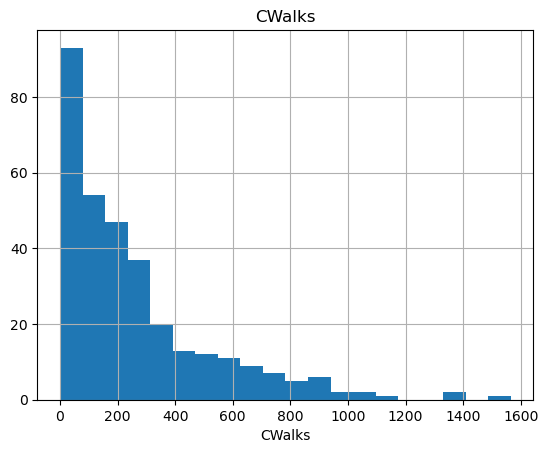

None
count    322.000
mean     288.938
std      280.705
min        0.000
5%        33.200
10%       62.200
20%       99.600
30%      132.000
40%      167.000
50%      212.000
60%      257.400
70%      303.000
80%      365.800
90%      685.600
95%      910.650
99%     1301.190
max     1378.000
Name: PutOuts, dtype: float64


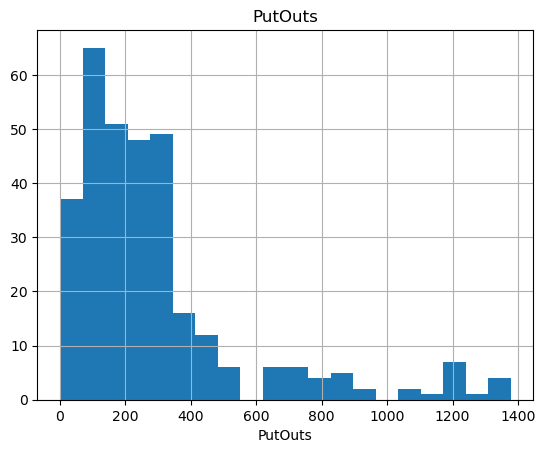

None
count   322.000
mean    106.913
std     136.855
min       0.000
5%        0.000
10%       2.000
20%       5.200
30%       9.000
40%      15.400
50%      39.500
60%      76.800
70%     134.800
80%     210.800
90%     353.300
95%     431.450
99%     478.160
max     492.000
Name: Assists, dtype: float64


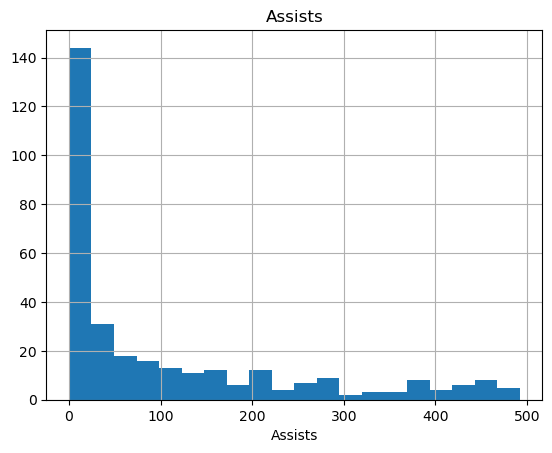

None
count   322.000
mean      8.040
std       6.368
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       8.000
70%      10.000
80%      13.000
90%      17.000
95%      20.000
99%      25.790
max      32.000
Name: Errors, dtype: float64


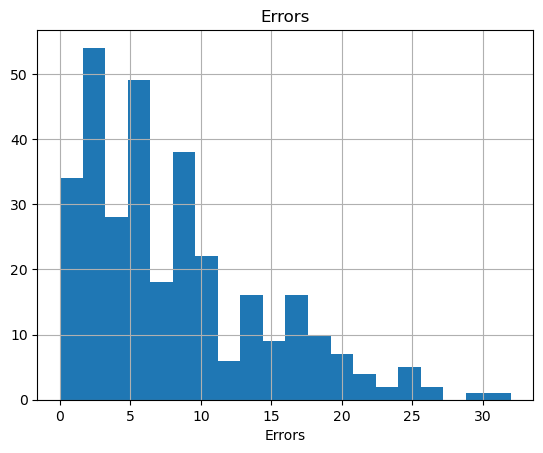

None
count    263.000
mean     535.926
std      451.119
min       67.500
5%        86.600
10%      100.000
20%      155.000
30%      221.000
40%      300.000
50%      425.000
60%      538.000
70%      700.000
80%      809.000
90%     1048.667
95%     1346.000
99%     2032.887
max     2460.000
Name: Salary, dtype: float64


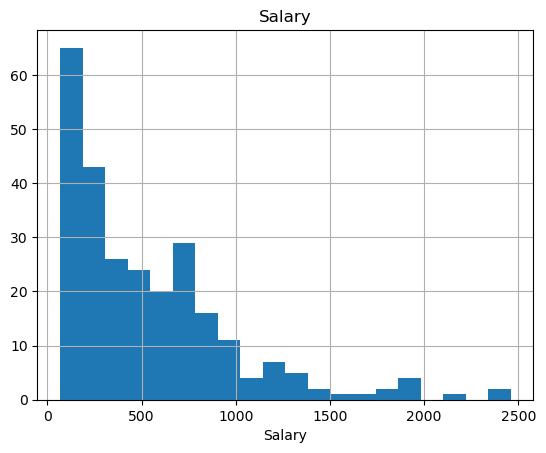

None


In [13]:
for col in num_cols:
    print(num_summary(df, col, plot = True))

**Adım 4:** Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre numerik değişkenlerin ortalaması)

In [14]:
def target_summary_with_cat(dataframe, target, categorical_col):
     print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end = "\n\n\n")

In [15]:
for col in cat_cols:
    print(target_summary_with_cat(df, "Salary", col))

        TARGET_MEAN
League             
A           542.000
N           529.118


None
          TARGET_MEAN
Division             
E             624.271
W             450.877


None
           TARGET_MEAN
NewLeague             
A              537.113
N              534.554


None


**Adım 5:** Korelasyon analizi gerçekleştiriniz.

In [16]:
def high_correlated_cols(dataframe, plot = False, corr_th = 0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k = 1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc = {'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap = "RdBu")
        plt.show()
    return drop_list

In [17]:
high_correlated_cols(df[num_cols].corr(), plot = False, corr_th = 0.90)

['Hits',
 'Runs',
 'RBI',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'Errors']

#### Görev 2: Feature Engineering

**Adım 1:** Eksik ve aykırı değerler için gerekli işlemleri yapınız.

In [18]:
def missing_values_table(dataframe, na_name = False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending = False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis = 1, keys = ['n_miss', 'ratio'])
    print(missing_df, end = "\n")
    if na_name:
        return na_columns

In [19]:
missing_values_table(df)

        n_miss  ratio
Salary      59 18.320


In [20]:
df.dropna(inplace = True)

In [21]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [22]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [23]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [24]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [25]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun True
Runs False
RBI False
Walks False
Years True
CAtBat True
CHits True
CHmRun True
CRuns True
CRBI True
CWalks True
PutOuts True
Assists True
Errors True
Salary True


In [26]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [27]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


**Adım 2:** Yeni değişkenler oluşturunuz.

In [28]:
# Feature Extraction

In [29]:
new_num_cols = [col for col in num_cols if col!= "Salary"]

df[new_num_cols] = df[new_num_cols] + 0.0000000001

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,N,W,632.000,43.000,10.000,475.000,N
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,A,W,636.000,82.000,14.000,480.000,A
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,208.750,828.000,838.000,354.000,N,E,200.000,11.000,3.000,500.000,N
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,N,E,636.000,40.000,4.000,91.500,N
5,594.000,169.000,4.000,74.000,51.000,35.000,11.000,4408.000,1133.000,19.000,501.000,336.000,194.000,A,W,282.000,421.000,25.000,750.000,A


In [30]:
df['NEW_Hits'] = df['Hits'] / df['CHits'] + df['Hits']

df['NEW_RBI'] = df['RBI'] / df['CRBI']

df['NEW_Walks'] = df['Walks'] / df['CWalks']

df['NEW_PutOuts'] = df['PutOuts'] * df['Years']

df["Hits_Success"] = (df["Hits"] / df["AtBat"]) * 100

df["NEW_CRBI*CATBAT"] = df['CRBI'] * df['CAtBat']

df["NEW_RBI"] = df["RBI"] / df["CRBI"]

df["NEW_Chits"] = df["CHits"] / df["Years"]

df["NEW_CHmRun"] = df["CHmRun"] * df["Years"]

df["NEW_CRuns"] = df["CRuns"] / df["Years"]

df["NEW_Chits"] = df["CHits"] * df["Years"]

df["NEW_RW"] = df["RBI"] * df["Walks"]

df["NEW_RBWALK"] = df["RBI"] / df["Walks"]

df["NEW_CH_CB"] = df["CHits"] / df["CAtBat"]

df["NEW_CHm_CAT"] = df["CHmRun"] / df["CAtBat"]

df['NEW_Diff_Atbat'] = df['AtBat'] - (df['CAtBat'] / df['Years'])

df['NEW_Diff_Hits'] = df['Hits'] - (df['CHits'] / df['Years'])

df['NEW_Diff_HmRun'] = df['HmRun'] - (df['CHmRun'] / df['Years'])

df['NEW_Diff_Runs'] = df['Runs'] - (df['CRuns'] / df['Years'])

df['NEW_Diff_RBI'] = df['RBI'] - (df['CRBI'] / df['Years'])

df['NEW_Diff_Walks'] = df['Walks'] - (df['CWalks'] / df['Years'])

In [31]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,NEW_RW,NEW_RBWALK,NEW_CH_CB,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,...,1482.000,0.974,0.242,0.020,68.643,21.357,2.071,1.071,8.429,12.214
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,...,5472.000,0.947,0.281,0.039,-62.333,-22.333,-3.000,-8.667,-16.667,-11.667
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,208.750,...,2886.000,2.108,0.280,0.037,-15.636,-2.182,1.023,-10.273,1.818,4.818
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,...,1260.000,1.400,0.255,0.030,123.000,36.500,4.000,15.000,19.000,13.500
5,594.000,169.000,4.000,74.000,51.000,35.000,11.000,4408.000,1133.000,19.000,...,1785.000,1.457,0.257,0.004,193.273,66.000,2.273,28.455,20.455,17.364


In [32]:
df.shape

(263, 39)

**Adım 3:** Encoding işlemlerini gerçekleştiriniz.

In [33]:
def one_hot_encoder(dataframe, categorical_cols, drop_first = False):
    dataframe = pd.get_dummies(dataframe, columns = categorical_cols, drop_first = drop_first)
    return dataframe

In [34]:
df = one_hot_encoder(df, cat_cols, drop_first = True)

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,...,0.020,68.643,21.357,2.071,1.071,8.429,12.214,True,True,True
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,...,0.039,-62.333,-22.333,-3.000,-8.667,-16.667,-11.667,False,True,False
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,208.750,...,0.037,-15.636,-2.182,1.023,-10.273,1.818,4.818,True,False,True
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,...,0.030,123.000,36.500,4.000,15.000,19.000,13.500,True,False,True
5,594.000,169.000,4.000,74.000,51.000,35.000,11.000,4408.000,1133.000,19.000,...,0.004,193.273,66.000,2.273,28.455,20.455,17.364,False,True,False


**Adım 4:** Numerik değişkenler için standartlaştırma yapınız.

In [35]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 39
cat_cols: 3
num_cols: 36
cat_but_car: 0
num_but_cat: 3


In [36]:
cat_cols

['League_N', 'Division_W', 'NewLeague_N']

In [37]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary',
 'NEW_Hits',
 'NEW_RBI',
 'NEW_Walks',
 'NEW_PutOuts',
 'Hits_Success',
 'NEW_CRBI*CATBAT',
 'NEW_Chits',
 'NEW_CHmRun',
 'NEW_CRuns',
 'NEW_RW',
 'NEW_RBWALK',
 'NEW_CH_CB',
 'NEW_CHm_CAT',
 'NEW_Diff_Atbat',
 'NEW_Diff_Hits',
 'NEW_Diff_HmRun',
 'NEW_Diff_Runs',
 'NEW_Diff_RBI',
 'NEW_Diff_Walks']

In [38]:
cat_but_car

[]

In [39]:
num_cols = [col for col in num_cols if col not in ["Salary"]]

num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'NEW_Hits',
 'NEW_RBI',
 'NEW_Walks',
 'NEW_PutOuts',
 'Hits_Success',
 'NEW_CRBI*CATBAT',
 'NEW_Chits',
 'NEW_CHmRun',
 'NEW_CRuns',
 'NEW_RW',
 'NEW_RBWALK',
 'NEW_CH_CB',
 'NEW_CHm_CAT',
 'NEW_Diff_Atbat',
 'NEW_Diff_Hits',
 'NEW_Diff_HmRun',
 'NEW_Diff_Runs',
 'NEW_Diff_RBI',
 'NEW_Diff_Walks']

In [40]:
scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
1,-0.603,-0.596,-0.529,-1.206,-0.522,-0.098,1.426,0.375,0.201,0.101,...,-0.277,-0.001,0.095,-0.274,-0.476,-0.215,0.145,True,True,True
2,0.513,0.492,0.734,0.442,0.794,1.609,-0.910,-0.461,-0.419,0.005,...,1.005,-1.142,-1.220,-1.273,-1.011,-1.672,-1.504,False,True,False
3,0.628,0.736,0.963,0.402,1.026,-0.190,0.789,1.373,1.415,2.339,...,0.889,-0.735,-0.614,-0.481,-1.099,-0.599,-0.366,True,False,True
4,-0.562,-0.462,-0.185,-0.618,-0.367,-0.513,-1.123,-1.023,-1.002,-0.811,...,0.426,0.472,0.550,0.105,0.290,0.399,0.233,True,False,True
5,1.295,1.358,-0.874,0.755,-0.019,-0.282,0.789,0.814,0.690,-0.699,...,-1.347,1.083,1.438,-0.235,1.030,0.484,0.500,False,True,False


**Adım 5:** Base Model Oluşturunuz.

In [41]:
y = df["Salary"]
X = df.drop("Salary", axis = 1)

In [42]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective = 'reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose = False))]

In [43]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv = 10, scoring = "neg_mean_squared_error")))
    print(f"RMSE:{round(rmse, 4)}({name})")

RMSE:234.3408(LR)
RMSE:231.6527(Ridge)
RMSE:228.3764(Lasso)
RMSE:256.4444(ElasticNet)
RMSE:255.7111(KNN)
RMSE:261.6179(CART)
RMSE:206.2348(RF)
RMSE:398.358(SVR)
RMSE:205.4838(GBM)
RMSE:216.2896(XGBoost)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 38
[LightGBM] [Info] Start training from score 525.722458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2438
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 38
[LightGBM] [Info] Start training from score 510.837456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

RMSE:218.8434(CatBoost)


In [44]:
# Random Forests

In [45]:
rf_model = RandomForestRegressor(random_state = 17)

rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500]}

rf_best_grid = GridSearchCV(rf_model, rf_params, cv = 5, n_jobs = -1, verbose = True).fit(X, y)

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state = 17).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(rf_final, X, y, cv = 10, scoring = "neg_mean_squared_error")))

rmse

Fitting 5 folds for each of 72 candidates, totalling 360 fits


203.25571066107042

In [46]:
# GBM Model

In [47]:
gbm_model = GradientBoostingRegressor(random_state = 17)

gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [500, 1000],
              "subsample": [1, 0.5, 0.7]}

gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv = 5, n_jobs = -1, verbose = True).fit(X, y)

gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state = 17).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(gbm_final, X, y, cv = 10, scoring = "neg_mean_squared_error")))
               
rmse

Fitting 5 folds for each of 24 candidates, totalling 120 fits


199.27635401704464

In [48]:
# LightGBM

In [49]:
lgbm_model = LGBMRegressor(random_state = 17)

lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [300, 500],
               "colsample_bytree": [0.7, 1]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv = 5, n_jobs = -1, verbose = True).fit(X, y)

lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state = 17).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(lgbm_final, X, y, cv = 10, scoring = "neg_mean_squared_error")))

rmse

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2664
[LightGBM] [Info] Number of data points in the train set: 263, number of used features: 38
[LightGBM] [Info] Start training from score 520.025259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 38
[LightGBM] [Info] Start training from score 525.722458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2429
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 38
[LightGBM] [Info] Start training from score 503.051453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2438
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 38
[LightGBM] [Info] Start training from score 510.837456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2439
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 38
[LightGBM] [Info] Start training from score 533.920431
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

220.9842866192677

In [50]:
# CatBoost

In [51]:
catboost_model = CatBoostRegressor(random_state = 17, verbose = False)

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv = 5, n_jobs = -1, verbose = True).fit(X, y)

catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state = 17).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(catboost_final, X, y, cv = 10, scoring = "neg_mean_squared_error")))

rmse

Fitting 5 folds for each of 8 candidates, totalling 40 fits


211.38250877309156

In [52]:
# Automated Hyperparameter Optimization

In [53]:
rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500]}

gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [500, 1000],
              "subsample": [1, 0.5, 0.7]}


lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500],
                   "colsample_bytree": [0.7, 1]}

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

In [54]:
regressors = [("RF", RandomForestRegressor(), rf_params),
              ('GBM', GradientBoostingRegressor(), gbm_params),
              ('LightGBM', LGBMRegressor(), lightgbm_params),
              ("CatBoost", CatBoostRegressor(), catboost_params)]


best_models = {}

In [55]:
for name, regressor, params in regressors:
    print(f"########## {name} ##########")
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv = 10, scoring = "neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

    gs_best = GridSearchCV(regressor, params, cv = 3, n_jobs = -1, verbose = False).fit(X, y)

    final_model = regressor.set_params(**gs_best.best_params_)
    rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv = 10, scoring = "neg_mean_squared_error")))
    print(f"RMSE (After): {round(rmse, 4)} ({name}) ")

    print(f"{name} best params: {gs_best.best_params_}", end = "\n\n")

    best_models[name] = final_model

########## RF ##########
RMSE: 201.8617 (RF) 
RMSE (After): 200.5167 (RF) 
RF best params: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 200}

########## GBM ##########
RMSE: 205.8029 (GBM) 
RMSE (After): 201.8173 (GBM) 
GBM best params: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}

########## LightGBM ##########
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 38
[LightGBM] [Info] Start training from score 525.722458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2429
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 38
[LightGBM] [Info] Start training from score 503.051453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2436
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 38
[LightGBM] [Info] Start training from score 514.127890
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2443
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 38
[LightGBM] [Info] Start training from score 524.500603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2446
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 38
[LightGBM] [Info] Start training from score 510.769941
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
RMSE (After): 220.9843 (LightGBM) 
LightGBM best params: {'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 500}

########## CatBoost ##########
Learning rate set to 0.032591
0:	learn: 403.3339394	total: 8.06ms	remaining: 8.05s
1:	learn: 397.1363576	total: 14.8ms	remaining: 7.39s
2:	learn: 390.9380142	total: 22ms	remaining: 7.3s
3:	learn: 384.6982942	total: 28.6ms	remaining: 7.12s
4:	learn: 378.7658769	total: 34.8ms	remaining: 6.92s
5:	learn: 372.6839015	total: 41.3ms	remaining: 6.84s
6:	learn: 366.4643595	total: 48ms	remaining: 6.81s
7:	learn: 360.7112151	total: 54.2ms	remaining: 6.72s
8:	learn: 355.3993334	total: 60ms	remaining: 6.6s
9:	learn: 349.8560370	total: 65.7ms	remainin

146:	learn: 130.9795001	total: 893ms	remaining: 5.18s
147:	learn: 130.3795300	total: 900ms	remaining: 5.18s
148:	learn: 129.8260451	total: 906ms	remaining: 5.17s
149:	learn: 129.5659307	total: 913ms	remaining: 5.17s
150:	learn: 129.1436811	total: 944ms	remaining: 5.31s
151:	learn: 128.6093857	total: 952ms	remaining: 5.31s
152:	learn: 128.1307023	total: 959ms	remaining: 5.31s
153:	learn: 127.7653399	total: 965ms	remaining: 5.3s
154:	learn: 127.0940439	total: 972ms	remaining: 5.3s
155:	learn: 126.9593514	total: 979ms	remaining: 5.29s
156:	learn: 126.8310467	total: 985ms	remaining: 5.29s
157:	learn: 126.6037244	total: 992ms	remaining: 5.29s
158:	learn: 126.1634716	total: 999ms	remaining: 5.28s
159:	learn: 125.5157235	total: 1s	remaining: 5.28s
160:	learn: 125.2561194	total: 1.01s	remaining: 5.28s
161:	learn: 124.6812978	total: 1.02s	remaining: 5.27s
162:	learn: 124.1521284	total: 1.02s	remaining: 5.26s
163:	learn: 124.0279756	total: 1.03s	remaining: 5.26s
164:	learn: 123.8063669	total: 1.

301:	learn: 76.8697188	total: 1.92s	remaining: 4.44s
302:	learn: 76.6776752	total: 1.93s	remaining: 4.44s
303:	learn: 76.3540183	total: 1.94s	remaining: 4.43s
304:	learn: 76.0299755	total: 1.94s	remaining: 4.42s
305:	learn: 75.9756020	total: 1.95s	remaining: 4.42s
306:	learn: 75.5407706	total: 1.96s	remaining: 4.42s
307:	learn: 75.2252121	total: 1.96s	remaining: 4.41s
308:	learn: 75.0421818	total: 1.97s	remaining: 4.4s
309:	learn: 74.6947324	total: 1.98s	remaining: 4.4s
310:	learn: 74.4391240	total: 1.98s	remaining: 4.39s
311:	learn: 74.2461540	total: 1.99s	remaining: 4.38s
312:	learn: 73.8703921	total: 2s	remaining: 4.38s
313:	learn: 73.6588675	total: 2s	remaining: 4.37s
314:	learn: 73.3058217	total: 2.01s	remaining: 4.36s
315:	learn: 73.0233310	total: 2.01s	remaining: 4.36s
316:	learn: 72.9754457	total: 2.02s	remaining: 4.35s
317:	learn: 72.9380172	total: 2.02s	remaining: 4.34s
318:	learn: 72.5712755	total: 2.03s	remaining: 4.33s
319:	learn: 72.2344681	total: 2.04s	remaining: 4.33s
3

469:	learn: 47.3566881	total: 2.93s	remaining: 3.3s
470:	learn: 47.3315459	total: 2.94s	remaining: 3.3s
471:	learn: 47.2040853	total: 2.94s	remaining: 3.29s
472:	learn: 47.0012158	total: 2.95s	remaining: 3.29s
473:	learn: 46.9437555	total: 2.96s	remaining: 3.28s
474:	learn: 46.8782433	total: 2.96s	remaining: 3.28s
475:	learn: 46.8111423	total: 2.97s	remaining: 3.27s
476:	learn: 46.6951972	total: 2.98s	remaining: 3.26s
477:	learn: 46.5689860	total: 2.98s	remaining: 3.26s
478:	learn: 46.5201076	total: 2.99s	remaining: 3.25s
479:	learn: 46.4350848	total: 3s	remaining: 3.25s
480:	learn: 46.1909269	total: 3s	remaining: 3.24s
481:	learn: 46.0129301	total: 3.01s	remaining: 3.23s
482:	learn: 45.9650371	total: 3.01s	remaining: 3.23s
483:	learn: 45.8516224	total: 3.02s	remaining: 3.22s
484:	learn: 45.7410307	total: 3.03s	remaining: 3.21s
485:	learn: 45.6328358	total: 3.03s	remaining: 3.21s
486:	learn: 45.4134009	total: 3.04s	remaining: 3.2s
487:	learn: 45.1974181	total: 3.04s	remaining: 3.19s
48

637:	learn: 27.2984312	total: 3.95s	remaining: 2.24s
638:	learn: 27.1996055	total: 3.95s	remaining: 2.23s
639:	learn: 27.1420236	total: 3.96s	remaining: 2.23s
640:	learn: 27.0558414	total: 3.97s	remaining: 2.22s
641:	learn: 26.9004109	total: 3.97s	remaining: 2.22s
642:	learn: 26.7390870	total: 3.98s	remaining: 2.21s
643:	learn: 26.6835686	total: 3.99s	remaining: 2.2s
644:	learn: 26.5825636	total: 3.99s	remaining: 2.2s
645:	learn: 26.5313303	total: 4s	remaining: 2.19s
646:	learn: 26.4770940	total: 4s	remaining: 2.18s
647:	learn: 26.3885545	total: 4.01s	remaining: 2.18s
648:	learn: 26.2636440	total: 4.01s	remaining: 2.17s
649:	learn: 26.2551602	total: 4.02s	remaining: 2.17s
650:	learn: 26.1756481	total: 4.03s	remaining: 2.16s
651:	learn: 26.0841119	total: 4.03s	remaining: 2.15s
652:	learn: 25.9862462	total: 4.04s	remaining: 2.15s
653:	learn: 25.8483248	total: 4.04s	remaining: 2.14s
654:	learn: 25.8213642	total: 4.05s	remaining: 2.13s
655:	learn: 25.7105620	total: 4.06s	remaining: 2.13s
6

808:	learn: 15.4384729	total: 4.98s	remaining: 1.18s
809:	learn: 15.4238911	total: 4.99s	remaining: 1.17s
810:	learn: 15.3784557	total: 4.99s	remaining: 1.16s
811:	learn: 15.3112051	total: 5s	remaining: 1.16s
812:	learn: 15.2320852	total: 5.03s	remaining: 1.16s
813:	learn: 15.2141538	total: 5.04s	remaining: 1.15s
814:	learn: 15.1800079	total: 5.05s	remaining: 1.15s
815:	learn: 15.1582452	total: 5.05s	remaining: 1.14s
816:	learn: 15.1268282	total: 5.06s	remaining: 1.13s
817:	learn: 15.0764098	total: 5.07s	remaining: 1.13s
818:	learn: 15.0293831	total: 5.07s	remaining: 1.12s
819:	learn: 14.9740299	total: 5.08s	remaining: 1.11s
820:	learn: 14.9167991	total: 5.08s	remaining: 1.11s
821:	learn: 14.8939228	total: 5.09s	remaining: 1.1s
822:	learn: 14.8496777	total: 5.1s	remaining: 1.1s
823:	learn: 14.8304943	total: 5.1s	remaining: 1.09s
824:	learn: 14.7752788	total: 5.11s	remaining: 1.08s
825:	learn: 14.7134662	total: 5.11s	remaining: 1.08s
826:	learn: 14.6500627	total: 5.12s	remaining: 1.07s


972:	learn: 9.4602150	total: 6s	remaining: 166ms
973:	learn: 9.4193861	total: 6s	remaining: 160ms
974:	learn: 9.4032955	total: 6.01s	remaining: 154ms
975:	learn: 9.3852517	total: 6.02s	remaining: 148ms
976:	learn: 9.3505985	total: 6.03s	remaining: 142ms
977:	learn: 9.3097565	total: 6.03s	remaining: 136ms
978:	learn: 9.2664412	total: 6.04s	remaining: 130ms
979:	learn: 9.2356755	total: 6.04s	remaining: 123ms
980:	learn: 9.1856442	total: 6.05s	remaining: 117ms
981:	learn: 9.1415958	total: 6.05s	remaining: 111ms
982:	learn: 9.0968813	total: 6.06s	remaining: 105ms
983:	learn: 9.0557060	total: 6.07s	remaining: 98.6ms
984:	learn: 9.0366738	total: 6.07s	remaining: 92.5ms
985:	learn: 9.0050830	total: 6.08s	remaining: 86.3ms
986:	learn: 8.9770350	total: 6.08s	remaining: 80.1ms
987:	learn: 8.9610453	total: 6.09s	remaining: 74ms
988:	learn: 8.9362228	total: 6.09s	remaining: 67.8ms
989:	learn: 8.9021420	total: 6.1s	remaining: 61.6ms
990:	learn: 8.8923637	total: 6.11s	remaining: 55.5ms
991:	learn: 8

130:	learn: 144.0092792	total: 799ms	remaining: 5.3s
131:	learn: 143.7010586	total: 805ms	remaining: 5.29s
132:	learn: 143.1622372	total: 812ms	remaining: 5.29s
133:	learn: 142.6549393	total: 818ms	remaining: 5.29s
134:	learn: 142.0058959	total: 826ms	remaining: 5.29s
135:	learn: 141.3169083	total: 831ms	remaining: 5.28s
136:	learn: 140.7961821	total: 837ms	remaining: 5.27s
137:	learn: 140.2151437	total: 844ms	remaining: 5.27s
138:	learn: 139.7482105	total: 850ms	remaining: 5.26s
139:	learn: 139.1938843	total: 856ms	remaining: 5.26s
140:	learn: 139.0051313	total: 862ms	remaining: 5.25s
141:	learn: 138.4232471	total: 868ms	remaining: 5.24s
142:	learn: 138.0092458	total: 874ms	remaining: 5.24s
143:	learn: 137.2374831	total: 881ms	remaining: 5.24s
144:	learn: 136.7571090	total: 888ms	remaining: 5.23s
145:	learn: 136.1402601	total: 894ms	remaining: 5.23s
146:	learn: 135.6021988	total: 900ms	remaining: 5.22s
147:	learn: 135.0810172	total: 907ms	remaining: 5.22s
148:	learn: 134.4643802	total

286:	learn: 82.1338502	total: 1.81s	remaining: 4.49s
287:	learn: 81.5466136	total: 1.81s	remaining: 4.49s
288:	learn: 81.3346393	total: 1.82s	remaining: 4.48s
289:	learn: 81.2188988	total: 1.83s	remaining: 4.47s
290:	learn: 80.7512309	total: 1.83s	remaining: 4.47s
291:	learn: 80.3181393	total: 1.84s	remaining: 4.46s
292:	learn: 80.0964346	total: 1.85s	remaining: 4.46s
293:	learn: 79.7323570	total: 1.85s	remaining: 4.45s
294:	learn: 79.4492382	total: 1.86s	remaining: 4.44s
295:	learn: 79.1682395	total: 1.86s	remaining: 4.43s
296:	learn: 78.8018676	total: 1.87s	remaining: 4.43s
297:	learn: 78.3770930	total: 1.88s	remaining: 4.42s
298:	learn: 77.8655935	total: 1.88s	remaining: 4.41s
299:	learn: 77.4588496	total: 1.89s	remaining: 4.41s
300:	learn: 77.0574683	total: 1.89s	remaining: 4.4s
301:	learn: 76.7547544	total: 1.9s	remaining: 4.39s
302:	learn: 76.3907864	total: 1.91s	remaining: 4.38s
303:	learn: 76.0168544	total: 1.91s	remaining: 4.38s
304:	learn: 75.9293497	total: 1.92s	remaining: 4

453:	learn: 47.9520523	total: 2.81s	remaining: 3.38s
454:	learn: 47.7152395	total: 2.82s	remaining: 3.38s
455:	learn: 47.6858297	total: 2.83s	remaining: 3.37s
456:	learn: 47.6600376	total: 2.83s	remaining: 3.37s
457:	learn: 47.5672302	total: 2.84s	remaining: 3.36s
458:	learn: 47.4205578	total: 2.85s	remaining: 3.35s
459:	learn: 47.3875411	total: 2.85s	remaining: 3.35s
460:	learn: 47.2856120	total: 2.86s	remaining: 3.34s
461:	learn: 47.2661985	total: 2.86s	remaining: 3.33s
462:	learn: 46.9900737	total: 2.87s	remaining: 3.33s
463:	learn: 46.9660689	total: 2.88s	remaining: 3.32s
464:	learn: 46.9274117	total: 2.88s	remaining: 3.31s
465:	learn: 46.9031523	total: 2.89s	remaining: 3.31s
466:	learn: 46.6260175	total: 2.89s	remaining: 3.3s
467:	learn: 46.5159260	total: 2.9s	remaining: 3.29s
468:	learn: 46.3584299	total: 2.9s	remaining: 3.29s
469:	learn: 46.2383873	total: 2.91s	remaining: 3.28s
470:	learn: 46.2139769	total: 2.92s	remaining: 3.27s
471:	learn: 46.0982660	total: 2.92s	remaining: 3.

621:	learn: 29.5010493	total: 3.83s	remaining: 2.32s
622:	learn: 29.3788355	total: 3.83s	remaining: 2.32s
623:	learn: 29.3230014	total: 3.84s	remaining: 2.31s
624:	learn: 29.2769436	total: 3.85s	remaining: 2.31s
625:	learn: 29.1627375	total: 3.85s	remaining: 2.3s
626:	learn: 29.1458341	total: 3.86s	remaining: 2.3s
627:	learn: 29.0223184	total: 3.87s	remaining: 2.29s
628:	learn: 29.0033620	total: 3.87s	remaining: 2.28s
629:	learn: 28.9493107	total: 3.88s	remaining: 2.28s
630:	learn: 28.8759689	total: 3.88s	remaining: 2.27s
631:	learn: 28.7434617	total: 3.89s	remaining: 2.26s
632:	learn: 28.6619115	total: 3.9s	remaining: 2.26s
633:	learn: 28.5293242	total: 3.9s	remaining: 2.25s
634:	learn: 28.4540069	total: 3.91s	remaining: 2.25s
635:	learn: 28.3470250	total: 3.91s	remaining: 2.24s
636:	learn: 28.2405934	total: 3.92s	remaining: 2.23s
637:	learn: 28.0667235	total: 3.92s	remaining: 2.23s
638:	learn: 27.9962169	total: 3.93s	remaining: 2.22s
639:	learn: 27.8762402	total: 3.94s	remaining: 2.2

777:	learn: 18.2836023	total: 4.8s	remaining: 1.37s
778:	learn: 18.2086029	total: 4.81s	remaining: 1.36s
779:	learn: 18.1687549	total: 4.82s	remaining: 1.36s
780:	learn: 18.0986198	total: 4.83s	remaining: 1.35s
781:	learn: 18.0271907	total: 4.83s	remaining: 1.35s
782:	learn: 18.0036764	total: 4.86s	remaining: 1.35s
783:	learn: 17.9774297	total: 4.87s	remaining: 1.34s
784:	learn: 17.9241660	total: 4.88s	remaining: 1.34s
785:	learn: 17.8639999	total: 4.88s	remaining: 1.33s
786:	learn: 17.8418301	total: 4.89s	remaining: 1.32s
787:	learn: 17.7763834	total: 4.9s	remaining: 1.32s
788:	learn: 17.7407469	total: 4.91s	remaining: 1.31s
789:	learn: 17.7005368	total: 4.91s	remaining: 1.31s
790:	learn: 17.6273993	total: 4.95s	remaining: 1.31s
791:	learn: 17.5474599	total: 4.99s	remaining: 1.31s
792:	learn: 17.5189464	total: 5.01s	remaining: 1.31s
793:	learn: 17.4390390	total: 5.02s	remaining: 1.3s
794:	learn: 17.3690014	total: 5.05s	remaining: 1.3s
795:	learn: 17.2928864	total: 5.06s	remaining: 1.3

940:	learn: 11.3343911	total: 6.03s	remaining: 378ms
941:	learn: 11.3068673	total: 6.04s	remaining: 372ms
942:	learn: 11.2991518	total: 6.04s	remaining: 365ms
943:	learn: 11.2520879	total: 6.05s	remaining: 359ms
944:	learn: 11.1928461	total: 6.05s	remaining: 352ms
945:	learn: 11.1818695	total: 6.06s	remaining: 346ms
946:	learn: 11.1511610	total: 6.07s	remaining: 340ms
947:	learn: 11.1394942	total: 6.08s	remaining: 333ms
948:	learn: 11.1133845	total: 6.08s	remaining: 327ms
949:	learn: 11.0816131	total: 6.09s	remaining: 320ms
950:	learn: 11.0582066	total: 6.09s	remaining: 314ms
951:	learn: 11.0385322	total: 6.1s	remaining: 308ms
952:	learn: 10.9987191	total: 6.11s	remaining: 301ms
953:	learn: 10.9385357	total: 6.11s	remaining: 295ms
954:	learn: 10.9317468	total: 6.12s	remaining: 288ms
955:	learn: 10.9241138	total: 6.12s	remaining: 282ms
956:	learn: 10.9091294	total: 6.13s	remaining: 275ms
957:	learn: 10.8866916	total: 6.13s	remaining: 269ms
958:	learn: 10.8373038	total: 6.14s	remaining: 

125:	learn: 139.4249918	total: 908ms	remaining: 6.3s
126:	learn: 138.8705162	total: 916ms	remaining: 6.29s
127:	learn: 138.4346130	total: 922ms	remaining: 6.28s
128:	learn: 137.6041107	total: 930ms	remaining: 6.28s
129:	learn: 136.9394805	total: 937ms	remaining: 6.27s
130:	learn: 136.5392700	total: 945ms	remaining: 6.27s
131:	learn: 135.9670425	total: 953ms	remaining: 6.27s
132:	learn: 135.5064282	total: 961ms	remaining: 6.27s
133:	learn: 134.9063616	total: 968ms	remaining: 6.25s
134:	learn: 134.2577893	total: 975ms	remaining: 6.25s
135:	learn: 133.6850138	total: 981ms	remaining: 6.23s
136:	learn: 133.0061386	total: 988ms	remaining: 6.22s
137:	learn: 132.3736483	total: 995ms	remaining: 6.21s
138:	learn: 131.9300078	total: 1s	remaining: 6.2s
139:	learn: 131.5183069	total: 1.01s	remaining: 6.2s
140:	learn: 131.2635959	total: 1.01s	remaining: 6.19s
141:	learn: 130.5330674	total: 1.02s	remaining: 6.18s
142:	learn: 130.0327873	total: 1.03s	remaining: 6.17s
143:	learn: 129.4692408	total: 1.0

300:	learn: 75.1920002	total: 2.33s	remaining: 5.42s
301:	learn: 74.9366910	total: 2.34s	remaining: 5.41s
302:	learn: 74.4470900	total: 2.35s	remaining: 5.4s
303:	learn: 74.0629419	total: 2.35s	remaining: 5.39s
304:	learn: 73.7547727	total: 2.36s	remaining: 5.38s
305:	learn: 73.4012319	total: 2.37s	remaining: 5.37s
306:	learn: 73.0938348	total: 2.37s	remaining: 5.36s
307:	learn: 72.6052743	total: 2.38s	remaining: 5.35s
308:	learn: 72.4050510	total: 2.39s	remaining: 5.34s
309:	learn: 71.9787095	total: 2.4s	remaining: 5.34s
310:	learn: 71.6012855	total: 2.4s	remaining: 5.33s
311:	learn: 71.5204197	total: 2.41s	remaining: 5.32s
312:	learn: 71.3279082	total: 2.42s	remaining: 5.31s
313:	learn: 71.1303293	total: 2.42s	remaining: 5.3s
314:	learn: 70.8090856	total: 2.43s	remaining: 5.29s
315:	learn: 70.7321254	total: 2.44s	remaining: 5.28s
316:	learn: 70.4122140	total: 2.45s	remaining: 5.28s
317:	learn: 70.0778998	total: 2.46s	remaining: 5.27s
318:	learn: 69.7526272	total: 2.46s	remaining: 5.2

466:	learn: 42.7460166	total: 3.56s	remaining: 4.06s
467:	learn: 42.5423313	total: 3.57s	remaining: 4.05s
468:	learn: 42.3880267	total: 3.57s	remaining: 4.04s
469:	learn: 42.2411741	total: 3.58s	remaining: 4.04s
470:	learn: 42.0077310	total: 3.58s	remaining: 4.03s
471:	learn: 41.8045895	total: 3.59s	remaining: 4.02s
472:	learn: 41.7688183	total: 3.6s	remaining: 4.01s
473:	learn: 41.6363903	total: 3.61s	remaining: 4s
474:	learn: 41.6079263	total: 3.61s	remaining: 3.99s
475:	learn: 41.4665864	total: 3.62s	remaining: 3.98s
476:	learn: 41.2971327	total: 3.62s	remaining: 3.97s
477:	learn: 41.1438375	total: 3.63s	remaining: 3.96s
478:	learn: 40.9921550	total: 3.63s	remaining: 3.95s
479:	learn: 40.9551993	total: 3.64s	remaining: 3.94s
480:	learn: 40.8728386	total: 3.65s	remaining: 3.94s
481:	learn: 40.7586856	total: 3.65s	remaining: 3.93s
482:	learn: 40.6132296	total: 3.66s	remaining: 3.92s
483:	learn: 40.4988647	total: 3.67s	remaining: 3.91s
484:	learn: 40.3371712	total: 3.67s	remaining: 3.9

639:	learn: 25.1500590	total: 4.79s	remaining: 2.69s
640:	learn: 25.1347653	total: 4.8s	remaining: 2.69s
641:	learn: 25.1157695	total: 4.81s	remaining: 2.68s
642:	learn: 25.1026372	total: 4.82s	remaining: 2.67s
643:	learn: 25.0843317	total: 4.82s	remaining: 2.67s
644:	learn: 24.9517310	total: 4.83s	remaining: 2.66s
645:	learn: 24.8957710	total: 4.84s	remaining: 2.65s
646:	learn: 24.7687552	total: 4.84s	remaining: 2.64s
647:	learn: 24.6818397	total: 4.85s	remaining: 2.63s
648:	learn: 24.5607699	total: 4.86s	remaining: 2.63s
649:	learn: 24.4777024	total: 4.86s	remaining: 2.62s
650:	learn: 24.3691011	total: 4.87s	remaining: 2.61s
651:	learn: 24.2707692	total: 4.88s	remaining: 2.6s
652:	learn: 24.1931043	total: 4.88s	remaining: 2.59s
653:	learn: 24.1087866	total: 4.89s	remaining: 2.59s
654:	learn: 24.0825767	total: 4.89s	remaining: 2.58s
655:	learn: 23.9761012	total: 4.9s	remaining: 2.57s
656:	learn: 23.8963909	total: 4.91s	remaining: 2.56s
657:	learn: 23.8131449	total: 4.91s	remaining: 2.

814:	learn: 14.9562192	total: 6.02s	remaining: 1.37s
815:	learn: 14.8980649	total: 6.03s	remaining: 1.36s
816:	learn: 14.8429858	total: 6.04s	remaining: 1.35s
817:	learn: 14.7900753	total: 6.05s	remaining: 1.34s
818:	learn: 14.7716511	total: 6.06s	remaining: 1.34s
819:	learn: 14.7001303	total: 6.06s	remaining: 1.33s
820:	learn: 14.6673770	total: 6.07s	remaining: 1.32s
821:	learn: 14.6364655	total: 6.08s	remaining: 1.32s
822:	learn: 14.6234293	total: 6.1s	remaining: 1.31s
823:	learn: 14.5979319	total: 6.11s	remaining: 1.3s
824:	learn: 14.5255118	total: 6.12s	remaining: 1.3s
825:	learn: 14.4630992	total: 6.13s	remaining: 1.29s
826:	learn: 14.3964117	total: 6.14s	remaining: 1.28s
827:	learn: 14.3906427	total: 6.15s	remaining: 1.28s
828:	learn: 14.3508892	total: 6.16s	remaining: 1.27s
829:	learn: 14.2907975	total: 6.17s	remaining: 1.26s
830:	learn: 14.2284772	total: 6.18s	remaining: 1.26s
831:	learn: 14.1860461	total: 6.19s	remaining: 1.25s
832:	learn: 14.1160444	total: 6.2s	remaining: 1.2

989:	learn: 8.4059715	total: 7.21s	remaining: 72.8ms
990:	learn: 8.3939241	total: 7.22s	remaining: 65.6ms
991:	learn: 8.3601396	total: 7.22s	remaining: 58.3ms
992:	learn: 8.3575467	total: 7.23s	remaining: 51ms
993:	learn: 8.3312141	total: 7.24s	remaining: 43.7ms
994:	learn: 8.3087908	total: 7.24s	remaining: 36.4ms
995:	learn: 8.3027105	total: 7.25s	remaining: 29.1ms
996:	learn: 8.2659648	total: 7.26s	remaining: 21.8ms
997:	learn: 8.2376605	total: 7.26s	remaining: 14.6ms
998:	learn: 8.1978635	total: 7.27s	remaining: 7.28ms
999:	learn: 8.1815727	total: 7.27s	remaining: 0us
Learning rate set to 0.032613
0:	learn: 394.0358576	total: 6.86ms	remaining: 6.85s
1:	learn: 387.7485085	total: 12.9ms	remaining: 6.45s
2:	learn: 381.6099760	total: 19.1ms	remaining: 6.35s
3:	learn: 375.7679600	total: 24.8ms	remaining: 6.17s
4:	learn: 370.0479643	total: 30.6ms	remaining: 6.09s
5:	learn: 364.9113730	total: 36.7ms	remaining: 6.08s
6:	learn: 359.4503404	total: 42.7ms	remaining: 6.05s
7:	learn: 354.0655722

144:	learn: 133.3482722	total: 850ms	remaining: 5.01s
145:	learn: 132.6626591	total: 857ms	remaining: 5.01s
146:	learn: 132.2002860	total: 864ms	remaining: 5.01s
147:	learn: 132.1124947	total: 866ms	remaining: 4.99s
148:	learn: 131.7038289	total: 873ms	remaining: 4.99s
149:	learn: 131.2640987	total: 880ms	remaining: 4.98s
150:	learn: 130.7340158	total: 887ms	remaining: 4.99s
151:	learn: 130.1469142	total: 893ms	remaining: 4.98s
152:	learn: 129.5162216	total: 901ms	remaining: 4.99s
153:	learn: 128.6884097	total: 909ms	remaining: 4.99s
154:	learn: 128.0155156	total: 917ms	remaining: 5s
155:	learn: 127.6316963	total: 923ms	remaining: 4.99s
156:	learn: 127.1007938	total: 930ms	remaining: 4.99s
157:	learn: 126.8986724	total: 936ms	remaining: 4.99s
158:	learn: 126.3880752	total: 943ms	remaining: 4.99s
159:	learn: 126.1890663	total: 950ms	remaining: 4.98s
160:	learn: 125.7303893	total: 956ms	remaining: 4.98s
161:	learn: 125.2185537	total: 962ms	remaining: 4.98s
162:	learn: 124.6808346	total: 

298:	learn: 73.2397907	total: 1.85s	remaining: 4.33s
299:	learn: 72.7869224	total: 1.86s	remaining: 4.33s
300:	learn: 72.4368958	total: 1.86s	remaining: 4.32s
301:	learn: 72.1477356	total: 1.87s	remaining: 4.32s
302:	learn: 71.9710836	total: 1.88s	remaining: 4.31s
303:	learn: 71.5239917	total: 1.88s	remaining: 4.31s
304:	learn: 71.2926331	total: 1.89s	remaining: 4.3s
305:	learn: 70.9838076	total: 1.89s	remaining: 4.29s
306:	learn: 70.7248344	total: 1.9s	remaining: 4.29s
307:	learn: 70.5775273	total: 1.91s	remaining: 4.28s
308:	learn: 70.2483951	total: 1.91s	remaining: 4.27s
309:	learn: 69.9187643	total: 1.92s	remaining: 4.26s
310:	learn: 69.7831662	total: 1.92s	remaining: 4.26s
311:	learn: 69.4716923	total: 1.93s	remaining: 4.25s
312:	learn: 69.1752679	total: 1.93s	remaining: 4.24s
313:	learn: 68.8640120	total: 1.94s	remaining: 4.24s
314:	learn: 68.7327723	total: 1.95s	remaining: 4.23s
315:	learn: 68.2737934	total: 1.95s	remaining: 4.22s
316:	learn: 67.9624911	total: 1.96s	remaining: 4

463:	learn: 42.4578977	total: 2.85s	remaining: 3.3s
464:	learn: 42.3106215	total: 2.86s	remaining: 3.29s
465:	learn: 42.1855864	total: 2.87s	remaining: 3.29s
466:	learn: 42.0179332	total: 2.87s	remaining: 3.28s
467:	learn: 41.9688202	total: 2.88s	remaining: 3.27s
468:	learn: 41.8455638	total: 2.89s	remaining: 3.27s
469:	learn: 41.6522397	total: 2.89s	remaining: 3.26s
470:	learn: 41.4782568	total: 2.9s	remaining: 3.26s
471:	learn: 41.4108982	total: 2.9s	remaining: 3.25s
472:	learn: 41.2774700	total: 2.91s	remaining: 3.24s
473:	learn: 41.1048274	total: 2.92s	remaining: 3.24s
474:	learn: 40.9021410	total: 2.92s	remaining: 3.23s
475:	learn: 40.7471725	total: 2.93s	remaining: 3.22s
476:	learn: 40.5938989	total: 2.94s	remaining: 3.22s
477:	learn: 40.5394973	total: 2.94s	remaining: 3.21s
478:	learn: 40.4023233	total: 2.95s	remaining: 3.21s
479:	learn: 40.3189228	total: 2.95s	remaining: 3.2s
480:	learn: 40.2033315	total: 2.96s	remaining: 3.19s
481:	learn: 40.0443065	total: 2.97s	remaining: 3.1

635:	learn: 24.1918737	total: 3.88s	remaining: 2.22s
636:	learn: 24.1076590	total: 3.88s	remaining: 2.21s
637:	learn: 23.9788856	total: 3.89s	remaining: 2.21s
638:	learn: 23.8847938	total: 3.9s	remaining: 2.2s
639:	learn: 23.7806501	total: 3.9s	remaining: 2.19s
640:	learn: 23.6615269	total: 3.91s	remaining: 2.19s
641:	learn: 23.5352683	total: 3.91s	remaining: 2.18s
642:	learn: 23.4468400	total: 3.92s	remaining: 2.18s
643:	learn: 23.3295720	total: 3.93s	remaining: 2.17s
644:	learn: 23.2931260	total: 3.93s	remaining: 2.16s
645:	learn: 23.2113937	total: 3.94s	remaining: 2.16s
646:	learn: 23.1211658	total: 3.94s	remaining: 2.15s
647:	learn: 23.0749492	total: 3.95s	remaining: 2.15s
648:	learn: 23.0312974	total: 3.96s	remaining: 2.14s
649:	learn: 22.9436155	total: 3.96s	remaining: 2.13s
650:	learn: 22.8560169	total: 3.97s	remaining: 2.13s
651:	learn: 22.7309821	total: 3.97s	remaining: 2.12s
652:	learn: 22.6966502	total: 3.98s	remaining: 2.11s
653:	learn: 22.6055183	total: 3.98s	remaining: 2.

806:	learn: 13.1509922	total: 4.89s	remaining: 1.17s
807:	learn: 13.1213263	total: 4.9s	remaining: 1.16s
808:	learn: 13.0742487	total: 4.91s	remaining: 1.16s
809:	learn: 13.0203655	total: 4.92s	remaining: 1.15s
810:	learn: 12.9736363	total: 4.92s	remaining: 1.15s
811:	learn: 12.9259124	total: 4.93s	remaining: 1.14s
812:	learn: 12.8974429	total: 4.93s	remaining: 1.13s
813:	learn: 12.8703689	total: 4.94s	remaining: 1.13s
814:	learn: 12.8236160	total: 4.94s	remaining: 1.12s
815:	learn: 12.7845384	total: 4.95s	remaining: 1.12s
816:	learn: 12.7779187	total: 4.96s	remaining: 1.11s
817:	learn: 12.7402214	total: 4.96s	remaining: 1.1s
818:	learn: 12.7237701	total: 4.97s	remaining: 1.1s
819:	learn: 12.6700961	total: 4.97s	remaining: 1.09s
820:	learn: 12.6314635	total: 4.98s	remaining: 1.08s
821:	learn: 12.6009873	total: 4.98s	remaining: 1.08s
822:	learn: 12.5600378	total: 4.99s	remaining: 1.07s
823:	learn: 12.5489746	total: 5s	remaining: 1.07s
824:	learn: 12.5017959	total: 5s	remaining: 1.06s
82

974:	learn: 7.7047839	total: 5.92s	remaining: 152ms
975:	learn: 7.6747155	total: 5.93s	remaining: 146ms
976:	learn: 7.6316961	total: 5.94s	remaining: 140ms
977:	learn: 7.6054033	total: 5.95s	remaining: 134ms
978:	learn: 7.5674747	total: 5.96s	remaining: 128ms
979:	learn: 7.5525834	total: 5.96s	remaining: 122ms
980:	learn: 7.5266083	total: 5.97s	remaining: 116ms
981:	learn: 7.4989048	total: 5.98s	remaining: 110ms
982:	learn: 7.4738704	total: 5.98s	remaining: 103ms
983:	learn: 7.4507195	total: 5.99s	remaining: 97.4ms
984:	learn: 7.4204570	total: 6s	remaining: 91.3ms
985:	learn: 7.4009827	total: 6s	remaining: 85.2ms
986:	learn: 7.3673302	total: 6.01s	remaining: 79.1ms
987:	learn: 7.3622894	total: 6.01s	remaining: 73.1ms
988:	learn: 7.3295506	total: 6.02s	remaining: 67ms
989:	learn: 7.2948877	total: 6.03s	remaining: 60.9ms
990:	learn: 7.2608945	total: 6.03s	remaining: 54.8ms
991:	learn: 7.2397174	total: 6.04s	remaining: 48.7ms
992:	learn: 7.2081554	total: 6.04s	remaining: 42.6ms
993:	learn

138:	learn: 135.0579321	total: 811ms	remaining: 5.02s
139:	learn: 134.2453331	total: 817ms	remaining: 5.02s
140:	learn: 133.3561996	total: 824ms	remaining: 5.02s
141:	learn: 132.5944614	total: 831ms	remaining: 5.02s
142:	learn: 132.1189192	total: 837ms	remaining: 5.02s
143:	learn: 131.3905489	total: 844ms	remaining: 5.02s
144:	learn: 130.7334012	total: 851ms	remaining: 5.02s
145:	learn: 129.9794574	total: 858ms	remaining: 5.02s
146:	learn: 129.6849430	total: 864ms	remaining: 5.01s
147:	learn: 129.2582077	total: 871ms	remaining: 5.01s
148:	learn: 128.8339988	total: 877ms	remaining: 5.01s
149:	learn: 128.5546412	total: 884ms	remaining: 5.01s
150:	learn: 127.8742109	total: 892ms	remaining: 5.01s
151:	learn: 127.4091091	total: 899ms	remaining: 5.01s
152:	learn: 126.7496262	total: 906ms	remaining: 5.02s
153:	learn: 126.2311298	total: 914ms	remaining: 5.02s
154:	learn: 125.5218632	total: 921ms	remaining: 5.02s
155:	learn: 125.1837547	total: 929ms	remaining: 5.03s
156:	learn: 125.0492641	tota

311:	learn: 72.4167164	total: 2.02s	remaining: 4.45s
312:	learn: 72.0928894	total: 2.02s	remaining: 4.44s
313:	learn: 71.7156332	total: 2.03s	remaining: 4.44s
314:	learn: 71.6560283	total: 2.04s	remaining: 4.44s
315:	learn: 71.2588055	total: 2.05s	remaining: 4.43s
316:	learn: 71.2043942	total: 2.05s	remaining: 4.42s
317:	learn: 70.8541607	total: 2.06s	remaining: 4.42s
318:	learn: 70.5092931	total: 2.07s	remaining: 4.42s
319:	learn: 70.2423613	total: 2.08s	remaining: 4.41s
320:	learn: 70.1825560	total: 2.08s	remaining: 4.4s
321:	learn: 69.8007400	total: 2.09s	remaining: 4.4s
322:	learn: 69.7180451	total: 2.1s	remaining: 4.39s
323:	learn: 69.4096409	total: 2.1s	remaining: 4.39s
324:	learn: 69.0367377	total: 2.11s	remaining: 4.38s
325:	learn: 68.9376449	total: 2.11s	remaining: 4.37s
326:	learn: 68.5829228	total: 2.12s	remaining: 4.36s
327:	learn: 68.4983540	total: 2.13s	remaining: 4.36s
328:	learn: 68.1695734	total: 2.13s	remaining: 4.35s
329:	learn: 68.0159640	total: 2.14s	remaining: 4.3

478:	learn: 43.0702787	total: 3.05s	remaining: 3.32s
479:	learn: 42.8438256	total: 3.06s	remaining: 3.31s
480:	learn: 42.5821767	total: 3.06s	remaining: 3.3s
481:	learn: 42.3668932	total: 3.07s	remaining: 3.3s
482:	learn: 42.2675066	total: 3.08s	remaining: 3.29s
483:	learn: 42.1121572	total: 3.08s	remaining: 3.29s
484:	learn: 41.9675232	total: 3.09s	remaining: 3.28s
485:	learn: 41.8618347	total: 3.09s	remaining: 3.27s
486:	learn: 41.7261776	total: 3.1s	remaining: 3.27s
487:	learn: 41.6155077	total: 3.1s	remaining: 3.26s
488:	learn: 41.4773388	total: 3.11s	remaining: 3.25s
489:	learn: 41.2593056	total: 3.12s	remaining: 3.24s
490:	learn: 41.1609776	total: 3.12s	remaining: 3.24s
491:	learn: 41.1082016	total: 3.13s	remaining: 3.23s
492:	learn: 40.9591908	total: 3.13s	remaining: 3.22s
493:	learn: 40.7625277	total: 3.14s	remaining: 3.22s
494:	learn: 40.5720183	total: 3.15s	remaining: 3.21s
495:	learn: 40.4750670	total: 3.15s	remaining: 3.2s
496:	learn: 40.4034709	total: 3.16s	remaining: 3.2s

644:	learn: 24.2520952	total: 4.08s	remaining: 2.25s
645:	learn: 24.1770756	total: 4.09s	remaining: 2.24s
646:	learn: 24.1161233	total: 4.1s	remaining: 2.23s
647:	learn: 24.0478390	total: 4.11s	remaining: 2.23s
648:	learn: 23.9261918	total: 4.13s	remaining: 2.23s
649:	learn: 23.8327088	total: 4.13s	remaining: 2.23s
650:	learn: 23.8040040	total: 4.14s	remaining: 2.22s
651:	learn: 23.7313276	total: 4.15s	remaining: 2.21s
652:	learn: 23.6135084	total: 4.16s	remaining: 2.21s
653:	learn: 23.4939039	total: 4.16s	remaining: 2.2s
654:	learn: 23.4583435	total: 4.17s	remaining: 2.2s
655:	learn: 23.3557676	total: 4.18s	remaining: 2.19s
656:	learn: 23.3208532	total: 4.18s	remaining: 2.18s
657:	learn: 23.2702610	total: 4.19s	remaining: 2.18s
658:	learn: 23.1988646	total: 4.19s	remaining: 2.17s
659:	learn: 23.1206996	total: 4.2s	remaining: 2.16s
660:	learn: 23.0150257	total: 4.21s	remaining: 2.16s
661:	learn: 22.8996535	total: 4.21s	remaining: 2.15s
662:	learn: 22.8736379	total: 4.22s	remaining: 2.1

803:	learn: 14.6667711	total: 5.13s	remaining: 1.25s
804:	learn: 14.6195734	total: 5.14s	remaining: 1.25s
805:	learn: 14.5749151	total: 5.15s	remaining: 1.24s
806:	learn: 14.4978113	total: 5.16s	remaining: 1.23s
807:	learn: 14.4343081	total: 5.16s	remaining: 1.23s
808:	learn: 14.3723300	total: 5.17s	remaining: 1.22s
809:	learn: 14.3509203	total: 5.18s	remaining: 1.21s
810:	learn: 14.3115604	total: 5.18s	remaining: 1.21s
811:	learn: 14.2615632	total: 5.19s	remaining: 1.2s
812:	learn: 14.2038494	total: 5.2s	remaining: 1.2s
813:	learn: 14.1526472	total: 5.21s	remaining: 1.19s
814:	learn: 14.1350304	total: 5.21s	remaining: 1.18s
815:	learn: 14.0746035	total: 5.22s	remaining: 1.18s
816:	learn: 14.0102149	total: 5.22s	remaining: 1.17s
817:	learn: 13.9889965	total: 5.23s	remaining: 1.16s
818:	learn: 13.9314892	total: 5.24s	remaining: 1.16s
819:	learn: 13.8713355	total: 5.25s	remaining: 1.15s
820:	learn: 13.8229575	total: 5.25s	remaining: 1.14s
821:	learn: 13.7803635	total: 5.26s	remaining: 1.

967:	learn: 8.7757888	total: 6.14s	remaining: 203ms
968:	learn: 8.7481040	total: 6.15s	remaining: 197ms
969:	learn: 8.7223299	total: 6.16s	remaining: 190ms
970:	learn: 8.6800803	total: 6.16s	remaining: 184ms
971:	learn: 8.6561235	total: 6.17s	remaining: 178ms
972:	learn: 8.6427718	total: 6.18s	remaining: 171ms
973:	learn: 8.6082915	total: 6.18s	remaining: 165ms
974:	learn: 8.5833653	total: 6.19s	remaining: 159ms
975:	learn: 8.5354419	total: 6.19s	remaining: 152ms
976:	learn: 8.5069252	total: 6.2s	remaining: 146ms
977:	learn: 8.4785914	total: 6.2s	remaining: 140ms
978:	learn: 8.4503865	total: 6.21s	remaining: 133ms
979:	learn: 8.4481814	total: 6.22s	remaining: 127ms
980:	learn: 8.4320958	total: 6.22s	remaining: 121ms
981:	learn: 8.4064914	total: 6.23s	remaining: 114ms
982:	learn: 8.3806533	total: 6.23s	remaining: 108ms
983:	learn: 8.3495435	total: 6.24s	remaining: 101ms
984:	learn: 8.3039938	total: 6.25s	remaining: 95.1ms
985:	learn: 8.2665412	total: 6.25s	remaining: 88.8ms
986:	learn: 

127:	learn: 141.3851007	total: 821ms	remaining: 5.59s
128:	learn: 140.8989532	total: 828ms	remaining: 5.59s
129:	learn: 140.3261074	total: 834ms	remaining: 5.58s
130:	learn: 139.5763908	total: 841ms	remaining: 5.58s
131:	learn: 138.9141645	total: 848ms	remaining: 5.57s
132:	learn: 138.3225105	total: 854ms	remaining: 5.57s
133:	learn: 137.7876835	total: 860ms	remaining: 5.56s
134:	learn: 136.8740411	total: 866ms	remaining: 5.55s
135:	learn: 136.3231870	total: 872ms	remaining: 5.54s
136:	learn: 135.6365438	total: 878ms	remaining: 5.53s
137:	learn: 135.4527246	total: 884ms	remaining: 5.52s
138:	learn: 135.0367897	total: 888ms	remaining: 5.5s
139:	learn: 134.4852279	total: 895ms	remaining: 5.5s
140:	learn: 134.1360776	total: 902ms	remaining: 5.49s
141:	learn: 133.7371422	total: 908ms	remaining: 5.49s
142:	learn: 133.2221373	total: 914ms	remaining: 5.48s
143:	learn: 132.7610184	total: 921ms	remaining: 5.47s
144:	learn: 132.3836085	total: 927ms	remaining: 5.47s
145:	learn: 131.6814814	total:

307:	learn: 72.4132777	total: 2.04s	remaining: 4.58s
308:	learn: 72.0271787	total: 2.04s	remaining: 4.57s
309:	learn: 71.6946368	total: 2.05s	remaining: 4.57s
310:	learn: 71.2911887	total: 2.06s	remaining: 4.56s
311:	learn: 70.9253586	total: 2.06s	remaining: 4.55s
312:	learn: 70.5433775	total: 2.07s	remaining: 4.55s
313:	learn: 70.1999437	total: 2.08s	remaining: 4.54s
314:	learn: 70.1145719	total: 2.08s	remaining: 4.53s
315:	learn: 69.6554962	total: 2.09s	remaining: 4.53s
316:	learn: 69.3379765	total: 2.1s	remaining: 4.52s
317:	learn: 69.0635497	total: 2.1s	remaining: 4.51s
318:	learn: 68.7311523	total: 2.11s	remaining: 4.5s
319:	learn: 68.2594829	total: 2.11s	remaining: 4.49s
320:	learn: 68.0011963	total: 2.12s	remaining: 4.48s
321:	learn: 67.9115958	total: 2.13s	remaining: 4.47s
322:	learn: 67.5083369	total: 2.13s	remaining: 4.47s
323:	learn: 67.1234988	total: 2.14s	remaining: 4.46s
324:	learn: 66.7165708	total: 2.14s	remaining: 4.45s
325:	learn: 66.4403978	total: 2.15s	remaining: 4.

467:	learn: 39.5369735	total: 3.07s	remaining: 3.49s
468:	learn: 39.4034503	total: 3.08s	remaining: 3.48s
469:	learn: 39.2076262	total: 3.08s	remaining: 3.48s
470:	learn: 39.0973185	total: 3.09s	remaining: 3.47s
471:	learn: 38.9449054	total: 3.1s	remaining: 3.46s
472:	learn: 38.7110188	total: 3.1s	remaining: 3.46s
473:	learn: 38.5090263	total: 3.11s	remaining: 3.45s
474:	learn: 38.3391922	total: 3.11s	remaining: 3.44s
475:	learn: 38.1889953	total: 3.12s	remaining: 3.43s
476:	learn: 38.1604568	total: 3.13s	remaining: 3.43s
477:	learn: 38.0117761	total: 3.13s	remaining: 3.42s
478:	learn: 37.9806407	total: 3.14s	remaining: 3.41s
479:	learn: 37.8888163	total: 3.14s	remaining: 3.4s
480:	learn: 37.6929671	total: 3.15s	remaining: 3.4s
481:	learn: 37.4753636	total: 3.15s	remaining: 3.39s
482:	learn: 37.4399087	total: 3.16s	remaining: 3.38s
483:	learn: 37.3140478	total: 3.17s	remaining: 3.38s
484:	learn: 37.1392083	total: 3.17s	remaining: 3.37s
485:	learn: 37.0106486	total: 3.18s	remaining: 3.3

640:	learn: 22.5052753	total: 4.1s	remaining: 2.3s
641:	learn: 22.4935121	total: 4.11s	remaining: 2.29s
642:	learn: 22.4606690	total: 4.11s	remaining: 2.28s
643:	learn: 22.3412744	total: 4.12s	remaining: 2.28s
644:	learn: 22.2615400	total: 4.13s	remaining: 2.27s
645:	learn: 22.1964657	total: 4.13s	remaining: 2.27s
646:	learn: 22.1706297	total: 4.14s	remaining: 2.26s
647:	learn: 22.0708550	total: 4.14s	remaining: 2.25s
648:	learn: 21.9589565	total: 4.15s	remaining: 2.24s
649:	learn: 21.8409236	total: 4.16s	remaining: 2.24s
650:	learn: 21.7503267	total: 4.16s	remaining: 2.23s
651:	learn: 21.6627124	total: 4.17s	remaining: 2.22s
652:	learn: 21.5747866	total: 4.17s	remaining: 2.22s
653:	learn: 21.5014944	total: 4.18s	remaining: 2.21s
654:	learn: 21.4413446	total: 4.18s	remaining: 2.2s
655:	learn: 21.3569980	total: 4.19s	remaining: 2.2s
656:	learn: 21.3468436	total: 4.2s	remaining: 2.19s
657:	learn: 21.2686376	total: 4.2s	remaining: 2.18s
658:	learn: 21.2260729	total: 4.21s	remaining: 2.18s

806:	learn: 13.4443296	total: 5.09s	remaining: 1.22s
807:	learn: 13.3873242	total: 5.1s	remaining: 1.21s
808:	learn: 13.3334151	total: 5.1s	remaining: 1.21s
809:	learn: 13.2574914	total: 5.11s	remaining: 1.2s
810:	learn: 13.1979209	total: 5.12s	remaining: 1.19s
811:	learn: 13.1263139	total: 5.13s	remaining: 1.19s
812:	learn: 13.0836673	total: 5.13s	remaining: 1.18s
813:	learn: 13.0117487	total: 5.14s	remaining: 1.17s
814:	learn: 12.9668307	total: 5.14s	remaining: 1.17s
815:	learn: 12.9147600	total: 5.15s	remaining: 1.16s
816:	learn: 12.9081864	total: 5.16s	remaining: 1.15s
817:	learn: 12.8990402	total: 5.16s	remaining: 1.15s
818:	learn: 12.8511032	total: 5.17s	remaining: 1.14s
819:	learn: 12.7494742	total: 5.17s	remaining: 1.14s
820:	learn: 12.6818851	total: 5.18s	remaining: 1.13s
821:	learn: 12.6349958	total: 5.18s	remaining: 1.12s
822:	learn: 12.6145542	total: 5.19s	remaining: 1.12s
823:	learn: 12.5763965	total: 5.2s	remaining: 1.11s
824:	learn: 12.5335090	total: 5.2s	remaining: 1.1s

973:	learn: 7.8727558	total: 6.09s	remaining: 163ms
974:	learn: 7.8408341	total: 6.1s	remaining: 156ms
975:	learn: 7.7921783	total: 6.11s	remaining: 150ms
976:	learn: 7.7620406	total: 6.12s	remaining: 144ms
977:	learn: 7.7527686	total: 6.12s	remaining: 138ms
978:	learn: 7.7295964	total: 6.13s	remaining: 131ms
979:	learn: 7.7067037	total: 6.13s	remaining: 125ms
980:	learn: 7.6823237	total: 6.14s	remaining: 119ms
981:	learn: 7.6510628	total: 6.14s	remaining: 113ms
982:	learn: 7.6411127	total: 6.15s	remaining: 106ms
983:	learn: 7.6032779	total: 6.16s	remaining: 100ms
984:	learn: 7.5694290	total: 6.16s	remaining: 93.9ms
985:	learn: 7.5638378	total: 6.17s	remaining: 87.6ms
986:	learn: 7.5362246	total: 6.17s	remaining: 81.3ms
987:	learn: 7.4969346	total: 6.18s	remaining: 75.1ms
988:	learn: 7.4920618	total: 6.19s	remaining: 68.8ms
989:	learn: 7.4620049	total: 6.19s	remaining: 62.6ms
990:	learn: 7.4516747	total: 6.2s	remaining: 56.3ms
991:	learn: 7.4344597	total: 6.2s	remaining: 50ms
992:	lear

135:	learn: 131.1045445	total: 814ms	remaining: 5.17s
136:	learn: 130.7416740	total: 820ms	remaining: 5.17s
137:	learn: 130.4162174	total: 827ms	remaining: 5.16s
138:	learn: 130.0528440	total: 833ms	remaining: 5.16s
139:	learn: 129.8289140	total: 840ms	remaining: 5.16s
140:	learn: 129.3411743	total: 846ms	remaining: 5.16s
141:	learn: 129.1081976	total: 852ms	remaining: 5.15s
142:	learn: 128.8166982	total: 857ms	remaining: 5.14s
143:	learn: 128.5151760	total: 863ms	remaining: 5.13s
144:	learn: 127.9063061	total: 869ms	remaining: 5.12s
145:	learn: 127.1210484	total: 875ms	remaining: 5.12s
146:	learn: 126.5215940	total: 880ms	remaining: 5.11s
147:	learn: 125.9600032	total: 887ms	remaining: 5.1s
148:	learn: 125.6957969	total: 893ms	remaining: 5.1s
149:	learn: 125.3755567	total: 899ms	remaining: 5.1s
150:	learn: 125.0175373	total: 906ms	remaining: 5.09s
151:	learn: 124.7399541	total: 912ms	remaining: 5.09s
152:	learn: 124.0157187	total: 918ms	remaining: 5.08s
153:	learn: 123.7967679	total: 

295:	learn: 75.5519695	total: 1.85s	remaining: 4.39s
296:	learn: 75.3109634	total: 1.85s	remaining: 4.39s
297:	learn: 74.9763880	total: 1.86s	remaining: 4.38s
298:	learn: 74.8477035	total: 1.86s	remaining: 4.37s
299:	learn: 74.4777566	total: 1.87s	remaining: 4.36s
300:	learn: 73.9185594	total: 1.88s	remaining: 4.36s
301:	learn: 73.7041046	total: 1.88s	remaining: 4.35s
302:	learn: 73.4244383	total: 1.89s	remaining: 4.34s
303:	learn: 73.3595171	total: 1.89s	remaining: 4.33s
304:	learn: 73.0099113	total: 1.9s	remaining: 4.33s
305:	learn: 72.4880296	total: 1.91s	remaining: 4.32s
306:	learn: 72.1704198	total: 1.91s	remaining: 4.31s
307:	learn: 71.7491202	total: 1.92s	remaining: 4.31s
308:	learn: 71.4220484	total: 1.92s	remaining: 4.3s
309:	learn: 71.0493245	total: 1.93s	remaining: 4.29s
310:	learn: 70.9247075	total: 1.94s	remaining: 4.29s
311:	learn: 70.5768967	total: 1.94s	remaining: 4.28s
312:	learn: 70.3632105	total: 1.95s	remaining: 4.27s
313:	learn: 70.1648343	total: 1.95s	remaining: 4

470:	learn: 40.8383795	total: 2.89s	remaining: 3.24s
471:	learn: 40.7109406	total: 2.89s	remaining: 3.24s
472:	learn: 40.5883677	total: 2.9s	remaining: 3.23s
473:	learn: 40.4565138	total: 2.91s	remaining: 3.23s
474:	learn: 40.3660078	total: 2.91s	remaining: 3.22s
475:	learn: 40.3463461	total: 2.92s	remaining: 3.21s
476:	learn: 40.2292511	total: 2.92s	remaining: 3.21s
477:	learn: 40.1577716	total: 2.93s	remaining: 3.2s
478:	learn: 40.0309031	total: 2.94s	remaining: 3.19s
479:	learn: 39.9530223	total: 2.94s	remaining: 3.19s
480:	learn: 39.8262171	total: 2.95s	remaining: 3.18s
481:	learn: 39.6377887	total: 2.95s	remaining: 3.17s
482:	learn: 39.5040975	total: 2.96s	remaining: 3.17s
483:	learn: 39.4869510	total: 2.96s	remaining: 3.16s
484:	learn: 39.3795926	total: 2.97s	remaining: 3.15s
485:	learn: 39.2675255	total: 2.98s	remaining: 3.15s
486:	learn: 39.0720456	total: 2.98s	remaining: 3.14s
487:	learn: 38.9388334	total: 2.99s	remaining: 3.14s
488:	learn: 38.7887031	total: 2.99s	remaining: 3

640:	learn: 24.9447916	total: 3.88s	remaining: 2.17s
641:	learn: 24.9314244	total: 3.89s	remaining: 2.17s
642:	learn: 24.8630059	total: 3.89s	remaining: 2.16s
643:	learn: 24.7938733	total: 3.9s	remaining: 2.16s
644:	learn: 24.7122267	total: 3.91s	remaining: 2.15s
645:	learn: 24.6176958	total: 3.91s	remaining: 2.14s
646:	learn: 24.4976930	total: 3.92s	remaining: 2.14s
647:	learn: 24.3892151	total: 3.92s	remaining: 2.13s
648:	learn: 24.2939801	total: 3.93s	remaining: 2.13s
649:	learn: 24.2258063	total: 3.94s	remaining: 2.12s
650:	learn: 24.1658354	total: 3.94s	remaining: 2.11s
651:	learn: 24.0646906	total: 3.95s	remaining: 2.11s
652:	learn: 23.9920761	total: 3.95s	remaining: 2.1s
653:	learn: 23.9779050	total: 3.96s	remaining: 2.09s
654:	learn: 23.9111250	total: 3.96s	remaining: 2.09s
655:	learn: 23.8496343	total: 3.97s	remaining: 2.08s
656:	learn: 23.7675253	total: 3.98s	remaining: 2.08s
657:	learn: 23.6864379	total: 3.98s	remaining: 2.07s
658:	learn: 23.5621184	total: 3.99s	remaining: 2

811:	learn: 15.1729974	total: 4.9s	remaining: 1.13s
812:	learn: 15.1420649	total: 4.91s	remaining: 1.13s
813:	learn: 15.0944061	total: 4.91s	remaining: 1.12s
814:	learn: 15.0189634	total: 4.92s	remaining: 1.12s
815:	learn: 14.9916633	total: 4.93s	remaining: 1.11s
816:	learn: 14.9183261	total: 4.93s	remaining: 1.1s
817:	learn: 14.9121678	total: 4.94s	remaining: 1.1s
818:	learn: 14.8381478	total: 4.95s	remaining: 1.09s
819:	learn: 14.8011451	total: 4.95s	remaining: 1.09s
820:	learn: 14.7050587	total: 4.96s	remaining: 1.08s
821:	learn: 14.6909304	total: 4.96s	remaining: 1.07s
822:	learn: 14.6232031	total: 4.97s	remaining: 1.07s
823:	learn: 14.5799459	total: 4.98s	remaining: 1.06s
824:	learn: 14.5375700	total: 4.98s	remaining: 1.06s
825:	learn: 14.5331659	total: 4.99s	remaining: 1.05s
826:	learn: 14.5286939	total: 4.99s	remaining: 1.04s
827:	learn: 14.5227457	total: 5s	remaining: 1.04s
828:	learn: 14.4943755	total: 5.01s	remaining: 1.03s
829:	learn: 14.4571701	total: 5.01s	remaining: 1.03s

993:	learn: 8.6215490	total: 6.11s	remaining: 36.9ms
994:	learn: 8.6163324	total: 6.12s	remaining: 30.8ms
995:	learn: 8.5693212	total: 6.13s	remaining: 24.6ms
996:	learn: 8.5443537	total: 6.13s	remaining: 18.5ms
997:	learn: 8.5231920	total: 6.14s	remaining: 12.3ms
998:	learn: 8.5197678	total: 6.15s	remaining: 6.15ms
999:	learn: 8.4980115	total: 6.15s	remaining: 0us
Learning rate set to 0.032613
0:	learn: 398.2053094	total: 6.63ms	remaining: 6.62s
1:	learn: 391.6622895	total: 12.5ms	remaining: 6.24s
2:	learn: 385.5131745	total: 18.1ms	remaining: 6.01s
3:	learn: 379.3337369	total: 23.7ms	remaining: 5.91s
4:	learn: 373.1218995	total: 30.3ms	remaining: 6.04s
5:	learn: 367.8699062	total: 36.4ms	remaining: 6.03s
6:	learn: 361.7209528	total: 42.4ms	remaining: 6.02s
7:	learn: 356.1291480	total: 48.2ms	remaining: 5.97s
8:	learn: 351.7320965	total: 53.8ms	remaining: 5.92s
9:	learn: 346.4586655	total: 60.8ms	remaining: 6.02s
10:	learn: 341.5021166	total: 67.6ms	remaining: 6.08s
11:	learn: 337.017

149:	learn: 132.2212620	total: 898ms	remaining: 5.09s
150:	learn: 131.6611857	total: 906ms	remaining: 5.09s
151:	learn: 130.9933947	total: 913ms	remaining: 5.09s
152:	learn: 130.6068749	total: 921ms	remaining: 5.1s
153:	learn: 130.2661883	total: 929ms	remaining: 5.1s
154:	learn: 129.4525676	total: 935ms	remaining: 5.1s
155:	learn: 129.1248275	total: 942ms	remaining: 5.09s
156:	learn: 128.3958756	total: 949ms	remaining: 5.09s
157:	learn: 128.2624475	total: 955ms	remaining: 5.09s
158:	learn: 128.0549206	total: 961ms	remaining: 5.08s
159:	learn: 127.5855460	total: 968ms	remaining: 5.08s
160:	learn: 126.9633308	total: 974ms	remaining: 5.08s
161:	learn: 126.5120828	total: 981ms	remaining: 5.07s
162:	learn: 126.2416436	total: 988ms	remaining: 5.07s
163:	learn: 125.7282174	total: 995ms	remaining: 5.07s
164:	learn: 125.3886778	total: 1s	remaining: 5.07s
165:	learn: 124.9308234	total: 1.01s	remaining: 5.06s
166:	learn: 124.5594065	total: 1.01s	remaining: 5.06s
167:	learn: 124.2646012	total: 1.0

303:	learn: 78.0469097	total: 1.9s	remaining: 4.35s
304:	learn: 77.6183510	total: 1.91s	remaining: 4.34s
305:	learn: 77.4957425	total: 1.91s	remaining: 4.34s
306:	learn: 77.1556417	total: 1.92s	remaining: 4.33s
307:	learn: 76.9679191	total: 1.93s	remaining: 4.33s
308:	learn: 76.7362953	total: 1.93s	remaining: 4.32s
309:	learn: 76.3578370	total: 1.94s	remaining: 4.31s
310:	learn: 76.0760494	total: 1.94s	remaining: 4.31s
311:	learn: 75.8090548	total: 1.95s	remaining: 4.3s
312:	learn: 75.2943219	total: 1.96s	remaining: 4.29s
313:	learn: 74.9941402	total: 1.96s	remaining: 4.28s
314:	learn: 74.6609239	total: 1.97s	remaining: 4.28s
315:	learn: 74.3961349	total: 1.97s	remaining: 4.27s
316:	learn: 74.0893707	total: 1.98s	remaining: 4.26s
317:	learn: 73.9888245	total: 1.98s	remaining: 4.25s
318:	learn: 73.7444763	total: 1.99s	remaining: 4.25s
319:	learn: 73.5014023	total: 1.99s	remaining: 4.24s
320:	learn: 73.2490170	total: 2s	remaining: 4.23s
321:	learn: 73.0923693	total: 2s	remaining: 4.22s
3

473:	learn: 42.0114227	total: 2.9s	remaining: 3.22s
474:	learn: 41.9814834	total: 2.91s	remaining: 3.22s
475:	learn: 41.8439768	total: 2.92s	remaining: 3.21s
476:	learn: 41.7169363	total: 2.92s	remaining: 3.21s
477:	learn: 41.6000747	total: 2.93s	remaining: 3.2s
478:	learn: 41.4906848	total: 2.94s	remaining: 3.19s
479:	learn: 41.3758069	total: 2.94s	remaining: 3.19s
480:	learn: 41.0849670	total: 2.95s	remaining: 3.18s
481:	learn: 40.9768005	total: 2.96s	remaining: 3.18s
482:	learn: 40.8796483	total: 2.96s	remaining: 3.17s
483:	learn: 40.7318236	total: 2.97s	remaining: 3.16s
484:	learn: 40.6609682	total: 2.97s	remaining: 3.16s
485:	learn: 40.5452223	total: 2.98s	remaining: 3.15s
486:	learn: 40.4024630	total: 2.98s	remaining: 3.14s
487:	learn: 40.3754716	total: 2.99s	remaining: 3.14s
488:	learn: 40.2601949	total: 3s	remaining: 3.13s
489:	learn: 40.0777942	total: 3s	remaining: 3.12s
490:	learn: 39.8611890	total: 3.01s	remaining: 3.12s
491:	learn: 39.6809050	total: 3.01s	remaining: 3.11s
4

642:	learn: 24.5144190	total: 3.9s	remaining: 2.16s
643:	learn: 24.3858043	total: 3.9s	remaining: 2.16s
644:	learn: 24.2485797	total: 3.91s	remaining: 2.15s
645:	learn: 24.1139997	total: 3.92s	remaining: 2.15s
646:	learn: 24.0715394	total: 3.92s	remaining: 2.14s
647:	learn: 23.9861346	total: 3.93s	remaining: 2.13s
648:	learn: 23.8706937	total: 3.94s	remaining: 2.13s
649:	learn: 23.8316101	total: 3.94s	remaining: 2.12s
650:	learn: 23.6704948	total: 3.95s	remaining: 2.12s
651:	learn: 23.5571121	total: 3.95s	remaining: 2.11s
652:	learn: 23.5488446	total: 3.96s	remaining: 2.1s
653:	learn: 23.4214502	total: 3.97s	remaining: 2.1s
654:	learn: 23.2693528	total: 3.97s	remaining: 2.09s
655:	learn: 23.1494152	total: 3.98s	remaining: 2.09s
656:	learn: 23.0674784	total: 3.98s	remaining: 2.08s
657:	learn: 22.9838804	total: 3.99s	remaining: 2.07s
658:	learn: 22.9543208	total: 4s	remaining: 2.07s
659:	learn: 22.8866267	total: 4s	remaining: 2.06s
660:	learn: 22.7848461	total: 4.01s	remaining: 2.05s
661

805:	learn: 14.2530144	total: 4.89s	remaining: 1.18s
806:	learn: 14.1722286	total: 4.89s	remaining: 1.17s
807:	learn: 14.1165254	total: 4.9s	remaining: 1.16s
808:	learn: 14.0473925	total: 4.91s	remaining: 1.16s
809:	learn: 14.0093940	total: 4.92s	remaining: 1.15s
810:	learn: 13.9751924	total: 4.92s	remaining: 1.15s
811:	learn: 13.9687828	total: 4.93s	remaining: 1.14s
812:	learn: 13.9080038	total: 4.93s	remaining: 1.13s
813:	learn: 13.8586003	total: 4.94s	remaining: 1.13s
814:	learn: 13.8480100	total: 4.94s	remaining: 1.12s
815:	learn: 13.7853062	total: 4.95s	remaining: 1.12s
816:	learn: 13.7502516	total: 4.96s	remaining: 1.11s
817:	learn: 13.6925262	total: 4.96s	remaining: 1.1s
818:	learn: 13.6324475	total: 4.97s	remaining: 1.1s
819:	learn: 13.5985358	total: 4.97s	remaining: 1.09s
820:	learn: 13.5424484	total: 4.98s	remaining: 1.08s
821:	learn: 13.5348193	total: 4.99s	remaining: 1.08s
822:	learn: 13.5111782	total: 4.99s	remaining: 1.07s
823:	learn: 13.4785525	total: 5s	remaining: 1.07s

973:	learn: 8.5006757	total: 5.9s	remaining: 157ms
974:	learn: 8.4580549	total: 5.9s	remaining: 151ms
975:	learn: 8.4156373	total: 5.91s	remaining: 145ms
976:	learn: 8.4077425	total: 5.92s	remaining: 139ms
977:	learn: 8.3940891	total: 5.93s	remaining: 133ms
978:	learn: 8.3836403	total: 5.95s	remaining: 128ms
979:	learn: 8.3421172	total: 5.96s	remaining: 122ms
980:	learn: 8.3218401	total: 5.97s	remaining: 116ms
981:	learn: 8.2973646	total: 5.97s	remaining: 110ms
982:	learn: 8.2804710	total: 5.98s	remaining: 103ms
983:	learn: 8.2584357	total: 5.99s	remaining: 97.4ms
984:	learn: 8.2412615	total: 5.99s	remaining: 91.3ms
985:	learn: 8.1916314	total: 6s	remaining: 85.2ms
986:	learn: 8.1782167	total: 6.01s	remaining: 79.1ms
987:	learn: 8.1527664	total: 6.01s	remaining: 73ms
988:	learn: 8.1404428	total: 6.02s	remaining: 66.9ms
989:	learn: 8.1216863	total: 6.02s	remaining: 60.8ms
990:	learn: 8.1012002	total: 6.03s	remaining: 54.8ms
991:	learn: 8.0650351	total: 6.04s	remaining: 48.7ms
992:	learn

135:	learn: 136.2600402	total: 807ms	remaining: 5.13s
136:	learn: 135.6942557	total: 815ms	remaining: 5.13s
137:	learn: 135.1273214	total: 820ms	remaining: 5.12s
138:	learn: 134.7827832	total: 826ms	remaining: 5.12s
139:	learn: 134.1135986	total: 833ms	remaining: 5.12s
140:	learn: 133.6271312	total: 839ms	remaining: 5.11s
141:	learn: 133.0736571	total: 846ms	remaining: 5.11s
142:	learn: 132.5653228	total: 852ms	remaining: 5.11s
143:	learn: 132.0210805	total: 858ms	remaining: 5.1s
144:	learn: 131.5203051	total: 864ms	remaining: 5.09s
145:	learn: 131.1409634	total: 870ms	remaining: 5.09s
146:	learn: 130.8243710	total: 875ms	remaining: 5.08s
147:	learn: 130.4139040	total: 881ms	remaining: 5.07s
148:	learn: 130.0330157	total: 887ms	remaining: 5.07s
149:	learn: 129.5729473	total: 894ms	remaining: 5.06s
150:	learn: 128.9469788	total: 900ms	remaining: 5.06s
151:	learn: 128.2961880	total: 907ms	remaining: 5.06s
152:	learn: 127.8038665	total: 913ms	remaining: 5.05s
153:	learn: 127.3860784	total

289:	learn: 75.9310956	total: 1.79s	remaining: 4.39s
290:	learn: 75.6203863	total: 1.8s	remaining: 4.39s
291:	learn: 75.3716588	total: 1.81s	remaining: 4.38s
292:	learn: 75.1919438	total: 1.81s	remaining: 4.38s
293:	learn: 74.7386382	total: 1.82s	remaining: 4.38s
294:	learn: 74.4533315	total: 1.83s	remaining: 4.37s
295:	learn: 74.2262564	total: 1.83s	remaining: 4.36s
296:	learn: 73.9138705	total: 1.84s	remaining: 4.36s
297:	learn: 73.7570557	total: 1.85s	remaining: 4.35s
298:	learn: 73.5375282	total: 1.85s	remaining: 4.34s
299:	learn: 73.2820584	total: 1.86s	remaining: 4.33s
300:	learn: 72.9013328	total: 1.86s	remaining: 4.33s
301:	learn: 72.7550303	total: 1.87s	remaining: 4.32s
302:	learn: 72.5053220	total: 1.88s	remaining: 4.31s
303:	learn: 72.1138114	total: 1.88s	remaining: 4.31s
304:	learn: 71.8998716	total: 1.89s	remaining: 4.3s
305:	learn: 71.4799285	total: 1.89s	remaining: 4.29s
306:	learn: 71.3546983	total: 1.9s	remaining: 4.28s
307:	learn: 71.1015072	total: 1.9s	remaining: 4.2

461:	learn: 42.6251891	total: 2.83s	remaining: 3.29s
462:	learn: 42.5686180	total: 2.83s	remaining: 3.28s
463:	learn: 42.3518271	total: 2.84s	remaining: 3.28s
464:	learn: 42.2717685	total: 2.85s	remaining: 3.27s
465:	learn: 42.1038816	total: 2.85s	remaining: 3.27s
466:	learn: 41.9551128	total: 2.86s	remaining: 3.26s
467:	learn: 41.7547312	total: 2.86s	remaining: 3.26s
468:	learn: 41.7103325	total: 2.87s	remaining: 3.25s
469:	learn: 41.6794823	total: 2.88s	remaining: 3.24s
470:	learn: 41.5558184	total: 2.88s	remaining: 3.24s
471:	learn: 41.5016479	total: 2.89s	remaining: 3.23s
472:	learn: 41.2369028	total: 2.89s	remaining: 3.23s
473:	learn: 40.9876384	total: 2.9s	remaining: 3.22s
474:	learn: 40.7985742	total: 2.91s	remaining: 3.21s
475:	learn: 40.7586763	total: 2.91s	remaining: 3.21s
476:	learn: 40.6562825	total: 2.92s	remaining: 3.2s
477:	learn: 40.5788541	total: 2.92s	remaining: 3.19s
478:	learn: 40.4346950	total: 2.93s	remaining: 3.19s
479:	learn: 40.1907042	total: 2.94s	remaining: 3

631:	learn: 24.6842062	total: 3.85s	remaining: 2.25s
632:	learn: 24.6254580	total: 3.86s	remaining: 2.24s
633:	learn: 24.5948686	total: 3.87s	remaining: 2.23s
634:	learn: 24.5438995	total: 3.88s	remaining: 2.23s
635:	learn: 24.5225721	total: 3.88s	remaining: 2.22s
636:	learn: 24.3881142	total: 3.89s	remaining: 2.22s
637:	learn: 24.3343385	total: 3.9s	remaining: 2.21s
638:	learn: 24.2663134	total: 3.9s	remaining: 2.2s
639:	learn: 24.1225745	total: 3.91s	remaining: 2.2s
640:	learn: 24.0198010	total: 3.91s	remaining: 2.19s
641:	learn: 23.9299973	total: 3.92s	remaining: 2.19s
642:	learn: 23.8052476	total: 3.92s	remaining: 2.18s
643:	learn: 23.7757549	total: 3.93s	remaining: 2.17s
644:	learn: 23.7161077	total: 3.94s	remaining: 2.17s
645:	learn: 23.6819297	total: 3.94s	remaining: 2.16s
646:	learn: 23.5918256	total: 3.95s	remaining: 2.15s
647:	learn: 23.5816044	total: 3.95s	remaining: 2.15s
648:	learn: 23.4985018	total: 3.96s	remaining: 2.14s
649:	learn: 23.4033754	total: 3.96s	remaining: 2.1

801:	learn: 14.5448299	total: 4.88s	remaining: 1.2s
802:	learn: 14.4821578	total: 4.89s	remaining: 1.2s
803:	learn: 14.4643947	total: 4.89s	remaining: 1.19s
804:	learn: 14.4196284	total: 4.9s	remaining: 1.19s
805:	learn: 14.4056524	total: 4.91s	remaining: 1.18s
806:	learn: 14.3655897	total: 4.91s	remaining: 1.18s
807:	learn: 14.3181728	total: 4.92s	remaining: 1.17s
808:	learn: 14.2803169	total: 4.93s	remaining: 1.16s
809:	learn: 14.2471851	total: 4.93s	remaining: 1.16s
810:	learn: 14.1842508	total: 4.94s	remaining: 1.15s
811:	learn: 14.0989441	total: 4.95s	remaining: 1.15s
812:	learn: 14.0584788	total: 4.95s	remaining: 1.14s
813:	learn: 13.9976713	total: 4.96s	remaining: 1.13s
814:	learn: 13.9585929	total: 4.96s	remaining: 1.13s
815:	learn: 13.9194966	total: 4.97s	remaining: 1.12s
816:	learn: 13.8598838	total: 4.97s	remaining: 1.11s
817:	learn: 13.8063792	total: 4.98s	remaining: 1.11s
818:	learn: 13.7362158	total: 4.99s	remaining: 1.1s
819:	learn: 13.6665682	total: 4.99s	remaining: 1.1

969:	learn: 8.8404116	total: 5.91s	remaining: 183ms
970:	learn: 8.8338682	total: 5.92s	remaining: 177ms
971:	learn: 8.7961326	total: 5.92s	remaining: 171ms
972:	learn: 8.7603803	total: 5.93s	remaining: 165ms
973:	learn: 8.7322098	total: 5.93s	remaining: 158ms
974:	learn: 8.6919140	total: 5.94s	remaining: 152ms
975:	learn: 8.6535595	total: 5.95s	remaining: 146ms
976:	learn: 8.6188221	total: 5.96s	remaining: 140ms
977:	learn: 8.5916862	total: 5.96s	remaining: 134ms
978:	learn: 8.5882006	total: 5.97s	remaining: 128ms
979:	learn: 8.5648066	total: 5.97s	remaining: 122ms
980:	learn: 8.5501286	total: 5.98s	remaining: 116ms
981:	learn: 8.5314475	total: 5.99s	remaining: 110ms
982:	learn: 8.5263543	total: 5.99s	remaining: 104ms
983:	learn: 8.4882698	total: 6s	remaining: 97.5ms
984:	learn: 8.4679793	total: 6s	remaining: 91.4ms
985:	learn: 8.4483516	total: 6.01s	remaining: 85.4ms
986:	learn: 8.4222178	total: 6.02s	remaining: 79.3ms
987:	learn: 8.3892176	total: 6.02s	remaining: 73.2ms
988:	learn: 8

139:	learn: 140.5184395	total: 820ms	remaining: 5.03s
140:	learn: 140.2253073	total: 826ms	remaining: 5.03s
141:	learn: 139.6612817	total: 832ms	remaining: 5.03s
142:	learn: 139.1320011	total: 839ms	remaining: 5.03s
143:	learn: 138.7746614	total: 845ms	remaining: 5.02s
144:	learn: 138.1450236	total: 852ms	remaining: 5.02s
145:	learn: 137.7758859	total: 857ms	remaining: 5.01s
146:	learn: 137.0003702	total: 863ms	remaining: 5.01s
147:	learn: 136.4058982	total: 869ms	remaining: 5s
148:	learn: 136.1621026	total: 874ms	remaining: 4.99s
149:	learn: 135.7065254	total: 881ms	remaining: 4.99s
150:	learn: 135.2856453	total: 887ms	remaining: 4.99s
151:	learn: 134.6415041	total: 893ms	remaining: 4.98s
152:	learn: 134.3163801	total: 900ms	remaining: 4.98s
153:	learn: 133.8032714	total: 906ms	remaining: 4.98s
154:	learn: 133.3170840	total: 913ms	remaining: 4.97s
155:	learn: 132.7813619	total: 919ms	remaining: 4.97s
156:	learn: 132.4088820	total: 925ms	remaining: 4.97s
157:	learn: 132.2019475	total: 

292:	learn: 86.9863906	total: 1.85s	remaining: 4.46s
293:	learn: 86.3910216	total: 1.85s	remaining: 4.46s
294:	learn: 86.1655733	total: 1.86s	remaining: 4.45s
295:	learn: 85.5684862	total: 1.87s	remaining: 4.44s
296:	learn: 85.1927120	total: 1.88s	remaining: 4.44s
297:	learn: 85.1430393	total: 1.88s	remaining: 4.43s
298:	learn: 84.6763180	total: 1.89s	remaining: 4.42s
299:	learn: 84.5385517	total: 1.89s	remaining: 4.42s
300:	learn: 83.9275980	total: 1.9s	remaining: 4.41s
301:	learn: 83.8293139	total: 1.91s	remaining: 4.41s
302:	learn: 83.5217400	total: 1.91s	remaining: 4.4s
303:	learn: 83.0857265	total: 1.92s	remaining: 4.39s
304:	learn: 82.5257579	total: 1.92s	remaining: 4.38s
305:	learn: 82.0544116	total: 1.93s	remaining: 4.38s
306:	learn: 81.6801703	total: 1.94s	remaining: 4.37s
307:	learn: 81.3260362	total: 1.94s	remaining: 4.36s
308:	learn: 81.0384195	total: 1.95s	remaining: 4.35s
309:	learn: 80.4737865	total: 1.95s	remaining: 4.35s
310:	learn: 79.9311850	total: 1.96s	remaining: 4

463:	learn: 47.1698781	total: 2.87s	remaining: 3.31s
464:	learn: 47.0416061	total: 2.87s	remaining: 3.3s
465:	learn: 46.8638825	total: 2.88s	remaining: 3.3s
466:	learn: 46.6255185	total: 2.88s	remaining: 3.29s
467:	learn: 46.4537626	total: 2.89s	remaining: 3.29s
468:	learn: 46.4291150	total: 2.9s	remaining: 3.28s
469:	learn: 46.3597891	total: 2.9s	remaining: 3.27s
470:	learn: 46.1483861	total: 2.91s	remaining: 3.27s
471:	learn: 45.8520517	total: 2.92s	remaining: 3.26s
472:	learn: 45.7846167	total: 2.92s	remaining: 3.25s
473:	learn: 45.7002063	total: 2.93s	remaining: 3.25s
474:	learn: 45.5242549	total: 2.93s	remaining: 3.24s
475:	learn: 45.4684821	total: 2.94s	remaining: 3.23s
476:	learn: 45.3596472	total: 2.94s	remaining: 3.23s
477:	learn: 45.0876799	total: 2.95s	remaining: 3.22s
478:	learn: 44.8739093	total: 2.96s	remaining: 3.21s
479:	learn: 44.6587726	total: 2.96s	remaining: 3.21s
480:	learn: 44.4939075	total: 2.97s	remaining: 3.2s
481:	learn: 44.2885109	total: 2.97s	remaining: 3.19

636:	learn: 26.9463432	total: 3.88s	remaining: 2.21s
637:	learn: 26.8919874	total: 3.89s	remaining: 2.21s
638:	learn: 26.8725829	total: 3.89s	remaining: 2.2s
639:	learn: 26.7674873	total: 3.9s	remaining: 2.19s
640:	learn: 26.7336645	total: 3.91s	remaining: 2.19s
641:	learn: 26.6055127	total: 3.91s	remaining: 2.18s
642:	learn: 26.5126720	total: 3.92s	remaining: 2.18s
643:	learn: 26.4638344	total: 3.93s	remaining: 2.17s
644:	learn: 26.3814968	total: 3.93s	remaining: 2.16s
645:	learn: 26.3722487	total: 3.94s	remaining: 2.16s
646:	learn: 26.2391409	total: 3.94s	remaining: 2.15s
647:	learn: 26.1410960	total: 3.95s	remaining: 2.15s
648:	learn: 26.1284534	total: 3.96s	remaining: 2.14s
649:	learn: 26.0815115	total: 3.96s	remaining: 2.13s
650:	learn: 26.0699470	total: 3.97s	remaining: 2.13s
651:	learn: 25.9435417	total: 3.98s	remaining: 2.12s
652:	learn: 25.8507394	total: 3.98s	remaining: 2.12s
653:	learn: 25.7106568	total: 3.99s	remaining: 2.11s
654:	learn: 25.7000226	total: 3.99s	remaining: 2

802:	learn: 16.8049796	total: 4.87s	remaining: 1.19s
803:	learn: 16.7980692	total: 4.87s	remaining: 1.19s
804:	learn: 16.7358599	total: 4.88s	remaining: 1.18s
805:	learn: 16.7024250	total: 4.89s	remaining: 1.18s
806:	learn: 16.6668883	total: 4.89s	remaining: 1.17s
807:	learn: 16.6249474	total: 4.9s	remaining: 1.16s
808:	learn: 16.5652979	total: 4.91s	remaining: 1.16s
809:	learn: 16.5047301	total: 4.91s	remaining: 1.15s
810:	learn: 16.4616305	total: 4.92s	remaining: 1.15s
811:	learn: 16.4260845	total: 4.92s	remaining: 1.14s
812:	learn: 16.3675224	total: 4.93s	remaining: 1.13s
813:	learn: 16.2989229	total: 4.93s	remaining: 1.13s
814:	learn: 16.2516448	total: 4.94s	remaining: 1.12s
815:	learn: 16.2163901	total: 4.95s	remaining: 1.11s
816:	learn: 16.2036676	total: 4.95s	remaining: 1.11s
817:	learn: 16.1044911	total: 4.96s	remaining: 1.1s
818:	learn: 16.0398440	total: 4.96s	remaining: 1.1s
819:	learn: 15.9791436	total: 4.97s	remaining: 1.09s
820:	learn: 15.9408908	total: 4.97s	remaining: 1.

972:	learn: 10.5926696	total: 5.9s	remaining: 164ms
973:	learn: 10.5731938	total: 5.9s	remaining: 158ms
974:	learn: 10.5361608	total: 5.91s	remaining: 152ms
975:	learn: 10.5032916	total: 5.92s	remaining: 145ms
976:	learn: 10.4961035	total: 5.92s	remaining: 139ms
977:	learn: 10.4748200	total: 5.93s	remaining: 133ms
978:	learn: 10.4147449	total: 5.93s	remaining: 127ms
979:	learn: 10.3885852	total: 5.94s	remaining: 121ms
980:	learn: 10.3795245	total: 5.95s	remaining: 115ms
981:	learn: 10.3759792	total: 5.95s	remaining: 109ms
982:	learn: 10.3583595	total: 5.96s	remaining: 103ms
983:	learn: 10.3518654	total: 5.96s	remaining: 97ms
984:	learn: 10.3180143	total: 5.97s	remaining: 90.9ms
985:	learn: 10.2799505	total: 5.97s	remaining: 84.8ms
986:	learn: 10.2692823	total: 5.98s	remaining: 78.8ms
987:	learn: 10.2583046	total: 5.99s	remaining: 72.7ms
988:	learn: 10.2048828	total: 5.99s	remaining: 66.7ms
989:	learn: 10.1861598	total: 6s	remaining: 60.6ms
990:	learn: 10.1493660	total: 6s	remaining: 54

190:	learn: 222.9771704	total: 379ms	remaining: 613ms
191:	learn: 222.7173895	total: 381ms	remaining: 612ms
192:	learn: 222.4249382	total: 384ms	remaining: 610ms
193:	learn: 222.0898575	total: 386ms	remaining: 608ms
194:	learn: 221.7351040	total: 388ms	remaining: 607ms
195:	learn: 221.3668965	total: 390ms	remaining: 605ms
196:	learn: 220.9881878	total: 392ms	remaining: 603ms
197:	learn: 220.7334198	total: 394ms	remaining: 601ms
198:	learn: 220.3700505	total: 396ms	remaining: 600ms
199:	learn: 220.1707413	total: 398ms	remaining: 598ms
200:	learn: 219.8136417	total: 401ms	remaining: 596ms
201:	learn: 219.4914289	total: 403ms	remaining: 594ms
202:	learn: 219.1590149	total: 405ms	remaining: 593ms
203:	learn: 218.7668428	total: 408ms	remaining: 591ms
204:	learn: 218.3765882	total: 410ms	remaining: 590ms
205:	learn: 218.1270345	total: 412ms	remaining: 588ms
206:	learn: 217.7657438	total: 414ms	remaining: 586ms
207:	learn: 217.4262977	total: 416ms	remaining: 584ms
208:	learn: 217.1194427	tota

355:	learn: 187.5641658	total: 753ms	remaining: 304ms
356:	learn: 187.3513233	total: 755ms	remaining: 303ms
357:	learn: 187.2043656	total: 758ms	remaining: 301ms
358:	learn: 187.1716642	total: 760ms	remaining: 299ms
359:	learn: 187.0834709	total: 763ms	remaining: 297ms
360:	learn: 186.8831544	total: 765ms	remaining: 295ms
361:	learn: 186.7012593	total: 768ms	remaining: 293ms
362:	learn: 186.5766911	total: 770ms	remaining: 291ms
363:	learn: 186.4527664	total: 772ms	remaining: 289ms
364:	learn: 186.3561949	total: 775ms	remaining: 287ms
365:	learn: 186.3079315	total: 777ms	remaining: 285ms
366:	learn: 186.1309642	total: 780ms	remaining: 283ms
367:	learn: 185.9978002	total: 783ms	remaining: 281ms
368:	learn: 185.8480633	total: 785ms	remaining: 279ms
369:	learn: 185.8031803	total: 787ms	remaining: 277ms
370:	learn: 185.7153396	total: 790ms	remaining: 275ms
371:	learn: 185.6065002	total: 792ms	remaining: 273ms
372:	learn: 185.5117772	total: 796ms	remaining: 271ms
373:	learn: 185.4489510	tota

31:	learn: 353.0447139	total: 56.6ms	remaining: 828ms
32:	learn: 351.3657741	total: 58.8ms	remaining: 832ms
33:	learn: 349.9939521	total: 60.7ms	remaining: 832ms
34:	learn: 348.5513944	total: 62.5ms	remaining: 831ms
35:	learn: 347.0465243	total: 64.4ms	remaining: 830ms
36:	learn: 345.6662800	total: 66.3ms	remaining: 829ms
37:	learn: 344.0597890	total: 68.1ms	remaining: 827ms
38:	learn: 342.8399911	total: 69.9ms	remaining: 826ms
39:	learn: 341.3454032	total: 71.7ms	remaining: 825ms
40:	learn: 340.0673562	total: 73.6ms	remaining: 824ms
41:	learn: 338.7959481	total: 75.5ms	remaining: 823ms
42:	learn: 337.4129591	total: 77.4ms	remaining: 823ms
43:	learn: 335.9684188	total: 79.2ms	remaining: 821ms
44:	learn: 334.5542424	total: 81.1ms	remaining: 820ms
45:	learn: 333.1810432	total: 83ms	remaining: 819ms
46:	learn: 331.8225748	total: 85.1ms	remaining: 820ms
47:	learn: 330.7580308	total: 87ms	remaining: 819ms
48:	learn: 329.2657771	total: 88.6ms	remaining: 815ms
49:	learn: 328.1201652	total: 90

246:	learn: 207.9008314	total: 423ms	remaining: 433ms
247:	learn: 207.5856516	total: 425ms	remaining: 432ms
248:	learn: 207.3361505	total: 427ms	remaining: 430ms
249:	learn: 207.0764309	total: 429ms	remaining: 429ms
250:	learn: 206.9190038	total: 431ms	remaining: 427ms
251:	learn: 206.5632378	total: 433ms	remaining: 426ms
252:	learn: 206.2590665	total: 434ms	remaining: 424ms
253:	learn: 206.0173830	total: 436ms	remaining: 422ms
254:	learn: 205.7995146	total: 438ms	remaining: 421ms
255:	learn: 205.5656590	total: 440ms	remaining: 419ms
256:	learn: 205.3450818	total: 442ms	remaining: 418ms
257:	learn: 205.1542076	total: 444ms	remaining: 416ms
258:	learn: 204.9320471	total: 446ms	remaining: 415ms
259:	learn: 204.7141827	total: 448ms	remaining: 413ms
260:	learn: 204.3883934	total: 449ms	remaining: 412ms
261:	learn: 204.1119413	total: 451ms	remaining: 410ms
262:	learn: 203.7892339	total: 453ms	remaining: 408ms
263:	learn: 203.4523611	total: 455ms	remaining: 407ms
264:	learn: 203.2587828	tota

444:	learn: 176.5380722	total: 791ms	remaining: 97.8ms
445:	learn: 176.4115826	total: 794ms	remaining: 96.1ms
446:	learn: 176.2594482	total: 796ms	remaining: 94.3ms
447:	learn: 176.1999378	total: 798ms	remaining: 92.6ms
448:	learn: 176.1261381	total: 799ms	remaining: 90.8ms
449:	learn: 176.0095355	total: 801ms	remaining: 89ms
450:	learn: 175.8708204	total: 803ms	remaining: 87.3ms
451:	learn: 175.7272253	total: 805ms	remaining: 85.5ms
452:	learn: 175.6726067	total: 807ms	remaining: 83.7ms
453:	learn: 175.6190671	total: 809ms	remaining: 81.9ms
454:	learn: 175.4185533	total: 810ms	remaining: 80.2ms
455:	learn: 175.3591842	total: 812ms	remaining: 78.4ms
456:	learn: 175.2241230	total: 814ms	remaining: 76.6ms
457:	learn: 175.0920886	total: 816ms	remaining: 74.8ms
458:	learn: 175.0016976	total: 818ms	remaining: 73ms
459:	learn: 174.7932663	total: 820ms	remaining: 71.3ms
460:	learn: 174.5329592	total: 821ms	remaining: 69.5ms
461:	learn: 174.4400177	total: 824ms	remaining: 67.8ms
462:	learn: 17

139:	learn: 252.0221080	total: 233ms	remaining: 598ms
140:	learn: 251.4958527	total: 235ms	remaining: 597ms
141:	learn: 250.9336499	total: 237ms	remaining: 597ms
142:	learn: 250.4875744	total: 238ms	remaining: 595ms
143:	learn: 249.9383449	total: 240ms	remaining: 594ms
144:	learn: 249.5147861	total: 242ms	remaining: 592ms
145:	learn: 249.1616487	total: 244ms	remaining: 591ms
146:	learn: 248.5132369	total: 246ms	remaining: 590ms
147:	learn: 247.9322478	total: 247ms	remaining: 588ms
148:	learn: 247.5390981	total: 249ms	remaining: 587ms
149:	learn: 247.1617792	total: 251ms	remaining: 585ms
150:	learn: 246.7513918	total: 253ms	remaining: 584ms
151:	learn: 246.0603595	total: 254ms	remaining: 582ms
152:	learn: 245.5406878	total: 256ms	remaining: 581ms
153:	learn: 245.1853223	total: 258ms	remaining: 579ms
154:	learn: 244.8287995	total: 260ms	remaining: 578ms
155:	learn: 244.2532367	total: 261ms	remaining: 577ms
156:	learn: 243.7570769	total: 264ms	remaining: 576ms
157:	learn: 243.2313917	tota

362:	learn: 191.0973401	total: 598ms	remaining: 226ms
363:	learn: 190.9572808	total: 600ms	remaining: 224ms
364:	learn: 190.7863963	total: 602ms	remaining: 223ms
365:	learn: 190.7045825	total: 604ms	remaining: 221ms
366:	learn: 190.5266708	total: 606ms	remaining: 220ms
367:	learn: 190.4007853	total: 608ms	remaining: 218ms
368:	learn: 190.2174738	total: 610ms	remaining: 217ms
369:	learn: 190.1586151	total: 612ms	remaining: 215ms
370:	learn: 190.0573222	total: 614ms	remaining: 213ms
371:	learn: 189.9723587	total: 616ms	remaining: 212ms
372:	learn: 189.8922377	total: 618ms	remaining: 210ms
373:	learn: 189.8061372	total: 619ms	remaining: 209ms
374:	learn: 189.6145547	total: 621ms	remaining: 207ms
375:	learn: 189.5088026	total: 623ms	remaining: 205ms
376:	learn: 189.4232134	total: 625ms	remaining: 204ms
377:	learn: 189.2982842	total: 627ms	remaining: 202ms
378:	learn: 189.1921044	total: 629ms	remaining: 201ms
379:	learn: 189.1067131	total: 631ms	remaining: 199ms
380:	learn: 188.9818072	tota

37:	learn: 326.9107896	total: 66.1ms	remaining: 804ms
38:	learn: 325.6503587	total: 68.6ms	remaining: 810ms
39:	learn: 324.2310883	total: 70.9ms	remaining: 815ms
40:	learn: 323.0917380	total: 73.1ms	remaining: 818ms
41:	learn: 322.1821084	total: 75.2ms	remaining: 820ms
42:	learn: 320.9815615	total: 77.3ms	remaining: 821ms
43:	learn: 319.8291541	total: 79.4ms	remaining: 823ms
44:	learn: 318.5093645	total: 81.5ms	remaining: 824ms
45:	learn: 317.1618315	total: 83.5ms	remaining: 824ms
46:	learn: 315.9602994	total: 85.4ms	remaining: 823ms
47:	learn: 314.8967027	total: 87.5ms	remaining: 824ms
48:	learn: 313.6587519	total: 89.5ms	remaining: 824ms
49:	learn: 312.6073770	total: 91.7ms	remaining: 825ms
50:	learn: 311.3594636	total: 93.9ms	remaining: 827ms
51:	learn: 310.1602367	total: 96.8ms	remaining: 834ms
52:	learn: 308.9290222	total: 98.8ms	remaining: 833ms
53:	learn: 308.0325468	total: 101ms	remaining: 832ms
54:	learn: 306.9196230	total: 103ms	remaining: 830ms
55:	learn: 305.8223297	total: 

216:	learn: 209.9962267	total: 441ms	remaining: 575ms
217:	learn: 209.6615937	total: 444ms	remaining: 574ms
218:	learn: 209.3811779	total: 446ms	remaining: 572ms
219:	learn: 209.0544469	total: 448ms	remaining: 571ms
220:	learn: 208.7404149	total: 451ms	remaining: 569ms
221:	learn: 208.5140187	total: 453ms	remaining: 567ms
222:	learn: 208.0916015	total: 455ms	remaining: 565ms
223:	learn: 207.7702857	total: 457ms	remaining: 564ms
224:	learn: 207.4162577	total: 460ms	remaining: 562ms
225:	learn: 207.1377689	total: 462ms	remaining: 560ms
226:	learn: 206.9286855	total: 464ms	remaining: 558ms
227:	learn: 206.7079741	total: 466ms	remaining: 556ms
228:	learn: 206.4450005	total: 468ms	remaining: 554ms
229:	learn: 206.1721111	total: 471ms	remaining: 553ms
230:	learn: 205.8902932	total: 473ms	remaining: 551ms
231:	learn: 205.5843100	total: 475ms	remaining: 548ms
232:	learn: 205.2814764	total: 477ms	remaining: 546ms
233:	learn: 204.9223663	total: 479ms	remaining: 544ms
234:	learn: 204.6254377	tota

411:	learn: 173.3749264	total: 809ms	remaining: 173ms
412:	learn: 173.2604359	total: 811ms	remaining: 171ms
413:	learn: 173.1036198	total: 814ms	remaining: 169ms
414:	learn: 173.0641184	total: 816ms	remaining: 167ms
415:	learn: 172.8594092	total: 818ms	remaining: 165ms
416:	learn: 172.8210921	total: 819ms	remaining: 163ms
417:	learn: 172.6691553	total: 821ms	remaining: 161ms
418:	learn: 172.5226854	total: 823ms	remaining: 159ms
419:	learn: 172.3921875	total: 825ms	remaining: 157ms
420:	learn: 172.2697305	total: 827ms	remaining: 155ms
421:	learn: 172.0923833	total: 829ms	remaining: 153ms
422:	learn: 171.9550353	total: 831ms	remaining: 151ms
423:	learn: 171.7587866	total: 833ms	remaining: 149ms
424:	learn: 171.5928890	total: 835ms	remaining: 147ms
425:	learn: 171.4981663	total: 837ms	remaining: 145ms
426:	learn: 171.3974039	total: 839ms	remaining: 143ms
427:	learn: 171.3535753	total: 841ms	remaining: 142ms
428:	learn: 171.2000554	total: 843ms	remaining: 140ms
429:	learn: 171.1211670	tota

106:	learn: 272.8740670	total: 187ms	remaining: 685ms
107:	learn: 272.1762491	total: 189ms	remaining: 685ms
108:	learn: 271.4626615	total: 191ms	remaining: 685ms
109:	learn: 270.7754418	total: 193ms	remaining: 683ms
110:	learn: 270.0047313	total: 195ms	remaining: 682ms
111:	learn: 269.2591063	total: 196ms	remaining: 681ms
112:	learn: 268.4388350	total: 198ms	remaining: 679ms
113:	learn: 267.8402396	total: 200ms	remaining: 678ms
114:	learn: 267.0781066	total: 202ms	remaining: 676ms
115:	learn: 266.3379445	total: 204ms	remaining: 675ms
116:	learn: 265.7756049	total: 206ms	remaining: 674ms
117:	learn: 265.2262724	total: 208ms	remaining: 672ms
118:	learn: 264.4822699	total: 210ms	remaining: 671ms
119:	learn: 263.9401871	total: 211ms	remaining: 669ms
120:	learn: 263.1641160	total: 214ms	remaining: 669ms
121:	learn: 262.6725319	total: 216ms	remaining: 669ms
122:	learn: 261.9632189	total: 218ms	remaining: 669ms
123:	learn: 261.3589543	total: 220ms	remaining: 667ms
124:	learn: 260.6282842	tota

292:	learn: 200.8268720	total: 555ms	remaining: 392ms
293:	learn: 200.6908269	total: 557ms	remaining: 390ms
294:	learn: 200.4276885	total: 559ms	remaining: 388ms
295:	learn: 200.1748874	total: 561ms	remaining: 386ms
296:	learn: 200.0230801	total: 563ms	remaining: 385ms
297:	learn: 199.8474079	total: 564ms	remaining: 383ms
298:	learn: 199.7378159	total: 566ms	remaining: 381ms
299:	learn: 199.5913283	total: 568ms	remaining: 379ms
300:	learn: 199.2740586	total: 570ms	remaining: 377ms
301:	learn: 199.1456780	total: 572ms	remaining: 375ms
302:	learn: 198.8929724	total: 574ms	remaining: 373ms
303:	learn: 198.7792253	total: 576ms	remaining: 371ms
304:	learn: 198.5916219	total: 577ms	remaining: 369ms
305:	learn: 198.4506262	total: 579ms	remaining: 367ms
306:	learn: 198.2393041	total: 581ms	remaining: 365ms
307:	learn: 198.0603172	total: 583ms	remaining: 363ms
308:	learn: 197.9830331	total: 585ms	remaining: 362ms
309:	learn: 197.7570578	total: 587ms	remaining: 360ms
310:	learn: 197.5792974	tota

485:	learn: 176.0957661	total: 917ms	remaining: 26.4ms
486:	learn: 176.0406529	total: 919ms	remaining: 24.5ms
487:	learn: 175.9224228	total: 922ms	remaining: 22.7ms
488:	learn: 175.7504428	total: 924ms	remaining: 20.8ms
489:	learn: 175.7168853	total: 925ms	remaining: 18.9ms
490:	learn: 175.5438186	total: 927ms	remaining: 17ms
491:	learn: 175.4221087	total: 930ms	remaining: 15.1ms
492:	learn: 175.3409692	total: 932ms	remaining: 13.2ms
493:	learn: 175.2440018	total: 934ms	remaining: 11.3ms
494:	learn: 175.1328115	total: 936ms	remaining: 9.45ms
495:	learn: 175.0854052	total: 938ms	remaining: 7.56ms
496:	learn: 174.9118554	total: 940ms	remaining: 5.67ms
497:	learn: 174.7825872	total: 942ms	remaining: 3.78ms
498:	learn: 174.6168083	total: 944ms	remaining: 1.89ms
499:	learn: 174.5103597	total: 946ms	remaining: 0us
0:	learn: 397.0737342	total: 2.31ms	remaining: 1.15s
1:	learn: 395.3824505	total: 4.14ms	remaining: 1.03s
2:	learn: 393.5057149	total: 6.01ms	remaining: 996ms
3:	learn: 391.4634583

142:	learn: 244.6997670	total: 292ms	remaining: 728ms
143:	learn: 244.1761069	total: 294ms	remaining: 727ms
144:	learn: 243.7622491	total: 296ms	remaining: 726ms
145:	learn: 243.4751059	total: 298ms	remaining: 724ms
146:	learn: 242.8003340	total: 300ms	remaining: 721ms
147:	learn: 242.2747945	total: 302ms	remaining: 719ms
148:	learn: 241.8014490	total: 304ms	remaining: 717ms
149:	learn: 241.3569315	total: 306ms	remaining: 715ms
150:	learn: 240.9010574	total: 308ms	remaining: 713ms
151:	learn: 240.4629942	total: 310ms	remaining: 711ms
152:	learn: 239.9305536	total: 312ms	remaining: 709ms
153:	learn: 239.4834798	total: 314ms	remaining: 706ms
154:	learn: 239.0800290	total: 316ms	remaining: 704ms
155:	learn: 238.5115558	total: 318ms	remaining: 702ms
156:	learn: 238.1404802	total: 321ms	remaining: 702ms
157:	learn: 237.5730802	total: 323ms	remaining: 699ms
158:	learn: 237.0638273	total: 325ms	remaining: 697ms
159:	learn: 236.5460836	total: 327ms	remaining: 695ms
160:	learn: 236.2097651	tota

341:	learn: 187.6669660	total: 663ms	remaining: 306ms
342:	learn: 187.4898878	total: 666ms	remaining: 305ms
343:	learn: 187.3411824	total: 668ms	remaining: 303ms
344:	learn: 187.3081144	total: 670ms	remaining: 301ms
345:	learn: 187.1999097	total: 673ms	remaining: 299ms
346:	learn: 187.1342835	total: 674ms	remaining: 297ms
347:	learn: 187.0176141	total: 676ms	remaining: 295ms
348:	learn: 186.8387076	total: 678ms	remaining: 294ms
349:	learn: 186.6305046	total: 680ms	remaining: 292ms
350:	learn: 186.5582505	total: 683ms	remaining: 290ms
351:	learn: 186.4159721	total: 685ms	remaining: 288ms
352:	learn: 186.3007691	total: 687ms	remaining: 286ms
353:	learn: 186.1910846	total: 689ms	remaining: 284ms
354:	learn: 186.0514508	total: 691ms	remaining: 282ms
355:	learn: 185.8246265	total: 693ms	remaining: 280ms
356:	learn: 185.6911095	total: 695ms	remaining: 278ms
357:	learn: 185.5591745	total: 698ms	remaining: 277ms
358:	learn: 185.5245108	total: 700ms	remaining: 275ms
359:	learn: 185.3768546	tota

29:	learn: 347.0993225	total: 52.9ms	remaining: 829ms
30:	learn: 345.7961106	total: 55.8ms	remaining: 844ms
31:	learn: 344.4043122	total: 58.1ms	remaining: 849ms
32:	learn: 342.8247437	total: 60.3ms	remaining: 853ms
33:	learn: 341.4483349	total: 62.5ms	remaining: 857ms
34:	learn: 340.1869752	total: 64.7ms	remaining: 859ms
35:	learn: 338.8856673	total: 66.8ms	remaining: 861ms
36:	learn: 337.4354768	total: 69ms	remaining: 864ms
37:	learn: 336.0163881	total: 71.1ms	remaining: 864ms
38:	learn: 334.8437452	total: 73.3ms	remaining: 867ms
39:	learn: 333.4399366	total: 75.5ms	remaining: 868ms
40:	learn: 332.1040972	total: 77.7ms	remaining: 870ms
41:	learn: 330.8385310	total: 79.8ms	remaining: 870ms
42:	learn: 329.5110226	total: 81.8ms	remaining: 870ms
43:	learn: 328.0820078	total: 83.9ms	remaining: 869ms
44:	learn: 326.5413993	total: 86.1ms	remaining: 871ms
45:	learn: 325.1898039	total: 88.3ms	remaining: 871ms
46:	learn: 323.9534754	total: 90.6ms	remaining: 873ms
47:	learn: 322.7477897	total: 

218:	learn: 214.3168601	total: 420ms	remaining: 539ms
219:	learn: 214.0328855	total: 422ms	remaining: 537ms
220:	learn: 213.7352573	total: 424ms	remaining: 535ms
221:	learn: 213.4908330	total: 426ms	remaining: 533ms
222:	learn: 213.1830292	total: 428ms	remaining: 531ms
223:	learn: 212.9792503	total: 430ms	remaining: 529ms
224:	learn: 212.6605413	total: 432ms	remaining: 527ms
225:	learn: 212.3623190	total: 434ms	remaining: 526ms
226:	learn: 212.0470118	total: 436ms	remaining: 524ms
227:	learn: 211.8403888	total: 438ms	remaining: 522ms
228:	learn: 211.5977056	total: 439ms	remaining: 520ms
229:	learn: 211.1868194	total: 441ms	remaining: 518ms
230:	learn: 210.9078226	total: 443ms	remaining: 516ms
231:	learn: 210.6344174	total: 445ms	remaining: 514ms
232:	learn: 210.2785264	total: 447ms	remaining: 512ms
233:	learn: 209.9360679	total: 449ms	remaining: 511ms
234:	learn: 209.6366547	total: 452ms	remaining: 510ms
235:	learn: 209.4447196	total: 454ms	remaining: 508ms
236:	learn: 209.1653453	tota

374:	learn: 183.5897217	total: 806ms	remaining: 269ms
375:	learn: 183.4962269	total: 808ms	remaining: 267ms
376:	learn: 183.4477138	total: 810ms	remaining: 264ms
377:	learn: 183.2739390	total: 812ms	remaining: 262ms
378:	learn: 183.1467367	total: 814ms	remaining: 260ms
379:	learn: 183.0664433	total: 816ms	remaining: 258ms
380:	learn: 182.8546387	total: 818ms	remaining: 256ms
381:	learn: 182.6894915	total: 820ms	remaining: 253ms
382:	learn: 182.6450988	total: 822ms	remaining: 251ms
383:	learn: 182.5854397	total: 824ms	remaining: 249ms
384:	learn: 182.4734883	total: 827ms	remaining: 247ms
385:	learn: 182.3120339	total: 829ms	remaining: 245ms
386:	learn: 182.1638587	total: 831ms	remaining: 243ms
387:	learn: 182.1309712	total: 833ms	remaining: 240ms
388:	learn: 182.0308263	total: 836ms	remaining: 238ms
389:	learn: 181.8361046	total: 838ms	remaining: 236ms
390:	learn: 181.7777888	total: 840ms	remaining: 234ms
391:	learn: 181.6792150	total: 842ms	remaining: 232ms
392:	learn: 181.5600298	tota

40:	learn: 327.3583087	total: 73.7ms	remaining: 825ms
41:	learn: 326.1273759	total: 76.2ms	remaining: 831ms
42:	learn: 324.7400506	total: 78.5ms	remaining: 834ms
43:	learn: 323.1933348	total: 80.5ms	remaining: 834ms
44:	learn: 321.6537489	total: 82.5ms	remaining: 834ms
45:	learn: 320.1468739	total: 84.6ms	remaining: 835ms
46:	learn: 318.8598386	total: 86.8ms	remaining: 836ms
47:	learn: 317.6471223	total: 89ms	remaining: 838ms
48:	learn: 316.0838243	total: 91.1ms	remaining: 838ms
49:	learn: 314.7891008	total: 93.1ms	remaining: 838ms
50:	learn: 313.4910203	total: 95.1ms	remaining: 837ms
51:	learn: 312.1881678	total: 97.1ms	remaining: 837ms
52:	learn: 310.7840022	total: 99.2ms	remaining: 837ms
53:	learn: 309.7827367	total: 101ms	remaining: 837ms
54:	learn: 308.5795367	total: 114ms	remaining: 921ms
55:	learn: 307.3072105	total: 116ms	remaining: 922ms
56:	learn: 306.2047816	total: 119ms	remaining: 923ms
57:	learn: 304.8845438	total: 121ms	remaining: 925ms
58:	learn: 303.7518493	total: 124ms

233:	learn: 197.6100256	total: 428ms	remaining: 487ms
234:	learn: 197.2934388	total: 430ms	remaining: 485ms
235:	learn: 196.9909244	total: 432ms	remaining: 484ms
236:	learn: 196.8045676	total: 434ms	remaining: 482ms
237:	learn: 196.4863152	total: 436ms	remaining: 480ms
238:	learn: 196.2258735	total: 438ms	remaining: 478ms
239:	learn: 195.9655908	total: 440ms	remaining: 476ms
240:	learn: 195.6998522	total: 441ms	remaining: 474ms
241:	learn: 195.4904783	total: 443ms	remaining: 472ms
242:	learn: 195.2187299	total: 445ms	remaining: 470ms
243:	learn: 194.9145406	total: 446ms	remaining: 468ms
244:	learn: 194.6340268	total: 448ms	remaining: 467ms
245:	learn: 194.4204200	total: 450ms	remaining: 465ms
246:	learn: 194.2151628	total: 452ms	remaining: 463ms
247:	learn: 193.9438456	total: 454ms	remaining: 461ms
248:	learn: 193.7560719	total: 455ms	remaining: 459ms
249:	learn: 193.5083066	total: 457ms	remaining: 457ms
250:	learn: 193.3530895	total: 459ms	remaining: 456ms
251:	learn: 193.1426577	tota

442:	learn: 166.7985984	total: 796ms	remaining: 102ms
443:	learn: 166.7025762	total: 800ms	remaining: 101ms
444:	learn: 166.6692898	total: 803ms	remaining: 99.2ms
445:	learn: 166.5452113	total: 805ms	remaining: 97.5ms
446:	learn: 166.4903428	total: 809ms	remaining: 95.9ms
447:	learn: 166.4247365	total: 812ms	remaining: 94.2ms
448:	learn: 166.3609652	total: 814ms	remaining: 92.5ms
449:	learn: 166.3027728	total: 817ms	remaining: 90.8ms
450:	learn: 166.1802706	total: 819ms	remaining: 89ms
451:	learn: 166.1410239	total: 822ms	remaining: 87.3ms
452:	learn: 166.0627463	total: 825ms	remaining: 85.6ms
453:	learn: 165.9022868	total: 828ms	remaining: 83.9ms
454:	learn: 165.7276381	total: 830ms	remaining: 82.1ms
455:	learn: 165.5606169	total: 833ms	remaining: 80.4ms
456:	learn: 165.5262699	total: 835ms	remaining: 78.6ms
457:	learn: 165.4188670	total: 838ms	remaining: 76.9ms
458:	learn: 165.2282925	total: 840ms	remaining: 75.1ms
459:	learn: 165.1874798	total: 843ms	remaining: 73.3ms
460:	learn: 16

101:	learn: 274.4757439	total: 185ms	remaining: 720ms
102:	learn: 273.6848528	total: 187ms	remaining: 720ms
103:	learn: 273.0762786	total: 189ms	remaining: 720ms
104:	learn: 272.4034388	total: 191ms	remaining: 718ms
105:	learn: 271.6574966	total: 193ms	remaining: 717ms
106:	learn: 270.9874173	total: 195ms	remaining: 715ms
107:	learn: 270.0579067	total: 197ms	remaining: 713ms
108:	learn: 269.4069282	total: 199ms	remaining: 713ms
109:	learn: 268.7577517	total: 201ms	remaining: 712ms
110:	learn: 268.1471175	total: 203ms	remaining: 712ms
111:	learn: 267.3482198	total: 205ms	remaining: 710ms
112:	learn: 266.4989333	total: 207ms	remaining: 710ms
113:	learn: 265.8122482	total: 210ms	remaining: 710ms
114:	learn: 265.0508759	total: 212ms	remaining: 709ms
115:	learn: 264.1676330	total: 215ms	remaining: 710ms
116:	learn: 263.6069787	total: 217ms	remaining: 709ms
117:	learn: 262.9900391	total: 219ms	remaining: 708ms
118:	learn: 262.4566758	total: 221ms	remaining: 707ms
119:	learn: 261.8046758	tota

291:	learn: 198.0668609	total: 560ms	remaining: 399ms
292:	learn: 197.8474023	total: 562ms	remaining: 397ms
293:	learn: 197.6468195	total: 565ms	remaining: 396ms
294:	learn: 197.3920743	total: 567ms	remaining: 394ms
295:	learn: 197.2962660	total: 569ms	remaining: 392ms
296:	learn: 197.0975212	total: 571ms	remaining: 390ms
297:	learn: 196.9173626	total: 573ms	remaining: 388ms
298:	learn: 196.6420415	total: 575ms	remaining: 386ms
299:	learn: 196.4831140	total: 577ms	remaining: 385ms
300:	learn: 196.2216438	total: 579ms	remaining: 383ms
301:	learn: 196.0736513	total: 581ms	remaining: 381ms
302:	learn: 195.8150538	total: 583ms	remaining: 379ms
303:	learn: 195.6160640	total: 585ms	remaining: 377ms
304:	learn: 195.4025334	total: 587ms	remaining: 375ms
305:	learn: 195.1345300	total: 589ms	remaining: 374ms
306:	learn: 194.9513020	total: 591ms	remaining: 372ms
307:	learn: 194.7689440	total: 594ms	remaining: 370ms
308:	learn: 194.7263520	total: 596ms	remaining: 368ms
309:	learn: 194.5124253	tota

486:	learn: 171.2890392	total: 924ms	remaining: 24.7ms
487:	learn: 171.1601798	total: 926ms	remaining: 22.8ms
488:	learn: 170.9904930	total: 928ms	remaining: 20.9ms
489:	learn: 170.9320817	total: 930ms	remaining: 19ms
490:	learn: 170.7336966	total: 932ms	remaining: 17.1ms
491:	learn: 170.5539285	total: 934ms	remaining: 15.2ms
492:	learn: 170.3486182	total: 935ms	remaining: 13.3ms
493:	learn: 170.2064599	total: 937ms	remaining: 11.4ms
494:	learn: 170.0862994	total: 939ms	remaining: 9.49ms
495:	learn: 169.9704870	total: 941ms	remaining: 7.59ms
496:	learn: 169.8215682	total: 943ms	remaining: 5.69ms
497:	learn: 169.6519963	total: 945ms	remaining: 3.79ms
498:	learn: 169.5428181	total: 947ms	remaining: 1.9ms
499:	learn: 169.4671923	total: 949ms	remaining: 0us
0:	learn: 401.5189472	total: 2.04ms	remaining: 1.02s
1:	learn: 399.5180516	total: 3.7ms	remaining: 922ms
2:	learn: 397.5956669	total: 5.41ms	remaining: 896ms
3:	learn: 395.4533357	total: 7.1ms	remaining: 881ms
4:	learn: 393.6882025	tota

176:	learn: 228.1497629	total: 287ms	remaining: 525ms
177:	learn: 227.6237929	total: 290ms	remaining: 525ms
178:	learn: 227.2508425	total: 292ms	remaining: 524ms
179:	learn: 226.7541610	total: 294ms	remaining: 523ms
180:	learn: 226.3428112	total: 296ms	remaining: 522ms
181:	learn: 225.8400273	total: 298ms	remaining: 521ms
182:	learn: 225.5195438	total: 300ms	remaining: 519ms
183:	learn: 225.1106702	total: 301ms	remaining: 518ms
184:	learn: 224.7109706	total: 303ms	remaining: 516ms
185:	learn: 224.3403757	total: 305ms	remaining: 515ms
186:	learn: 223.9617294	total: 307ms	remaining: 513ms
187:	learn: 223.5381179	total: 308ms	remaining: 512ms
188:	learn: 223.0957758	total: 310ms	remaining: 510ms
189:	learn: 222.6497982	total: 312ms	remaining: 509ms
190:	learn: 222.1680594	total: 314ms	remaining: 507ms
191:	learn: 221.8969770	total: 315ms	remaining: 506ms
192:	learn: 221.4585621	total: 317ms	remaining: 504ms
193:	learn: 221.1169117	total: 319ms	remaining: 503ms
194:	learn: 220.8288484	tota

395:	learn: 178.9008980	total: 654ms	remaining: 172ms
396:	learn: 178.8238771	total: 656ms	remaining: 170ms
397:	learn: 178.6621419	total: 658ms	remaining: 169ms
398:	learn: 178.5554808	total: 660ms	remaining: 167ms
399:	learn: 178.5134556	total: 662ms	remaining: 165ms
400:	learn: 178.4342813	total: 663ms	remaining: 164ms
401:	learn: 178.2586183	total: 665ms	remaining: 162ms
402:	learn: 178.2149126	total: 667ms	remaining: 161ms
403:	learn: 178.0842290	total: 669ms	remaining: 159ms
404:	learn: 178.0155103	total: 671ms	remaining: 157ms
405:	learn: 177.8130396	total: 673ms	remaining: 156ms
406:	learn: 177.6507799	total: 675ms	remaining: 154ms
407:	learn: 177.5593300	total: 677ms	remaining: 153ms
408:	learn: 177.4384384	total: 678ms	remaining: 151ms
409:	learn: 177.3500221	total: 680ms	remaining: 149ms
410:	learn: 177.2871344	total: 682ms	remaining: 148ms
411:	learn: 177.1496929	total: 684ms	remaining: 146ms
412:	learn: 177.0110787	total: 686ms	remaining: 145ms
413:	learn: 176.8895823	tota

78:	learn: 290.1491017	total: 130ms	remaining: 694ms
79:	learn: 289.4263713	total: 132ms	remaining: 695ms
80:	learn: 288.6228771	total: 135ms	remaining: 696ms
81:	learn: 287.7873939	total: 136ms	remaining: 696ms
82:	learn: 287.0787143	total: 138ms	remaining: 695ms
83:	learn: 286.1168911	total: 140ms	remaining: 694ms
84:	learn: 285.2611081	total: 142ms	remaining: 692ms
85:	learn: 284.5559131	total: 144ms	remaining: 691ms
86:	learn: 283.6274542	total: 145ms	remaining: 691ms
87:	learn: 282.6166033	total: 147ms	remaining: 690ms
88:	learn: 281.7073797	total: 149ms	remaining: 690ms
89:	learn: 280.8688854	total: 151ms	remaining: 690ms
90:	learn: 280.0883212	total: 153ms	remaining: 689ms
91:	learn: 279.2483676	total: 155ms	remaining: 689ms
92:	learn: 278.2949867	total: 157ms	remaining: 688ms
93:	learn: 277.5289985	total: 159ms	remaining: 688ms
94:	learn: 276.5441730	total: 161ms	remaining: 687ms
95:	learn: 275.7331503	total: 164ms	remaining: 688ms
96:	learn: 274.9137586	total: 165ms	remaining:

291:	learn: 201.6359365	total: 495ms	remaining: 353ms
292:	learn: 201.3747476	total: 497ms	remaining: 351ms
293:	learn: 201.1396716	total: 499ms	remaining: 350ms
294:	learn: 201.0232974	total: 501ms	remaining: 348ms
295:	learn: 200.8672031	total: 503ms	remaining: 347ms
296:	learn: 200.8034413	total: 505ms	remaining: 345ms
297:	learn: 200.7470211	total: 507ms	remaining: 343ms
298:	learn: 200.6575075	total: 509ms	remaining: 342ms
299:	learn: 200.5036042	total: 511ms	remaining: 340ms
300:	learn: 200.2467955	total: 512ms	remaining: 339ms
301:	learn: 200.1303307	total: 514ms	remaining: 337ms
302:	learn: 199.9333134	total: 516ms	remaining: 336ms
303:	learn: 199.8282809	total: 518ms	remaining: 334ms
304:	learn: 199.7826329	total: 520ms	remaining: 332ms
305:	learn: 199.5091189	total: 522ms	remaining: 331ms
306:	learn: 199.3128318	total: 523ms	remaining: 329ms
307:	learn: 199.2680228	total: 525ms	remaining: 327ms
308:	learn: 199.2089948	total: 527ms	remaining: 326ms
309:	learn: 199.0141194	tota

RMSE (After): 218.788 (CatBoost) 
CatBoost best params: {'depth': 3, 'iterations': 500, 'learning_rate': 0.01}



In [56]:
# Feature Importance

In [57]:
def plot_importance(model, features, num = len(X), save = False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize = (6, 4))
    sns.set(font_scale = 1)
    sns.barplot(x = "Value", y = "Feature", data = feature_imp.sort_values(by = "Value",
                                                                     ascending = False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

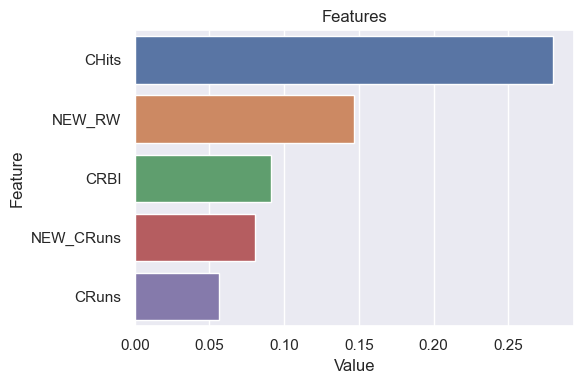

In [58]:
plot_importance(rf_final, X, num = 5)

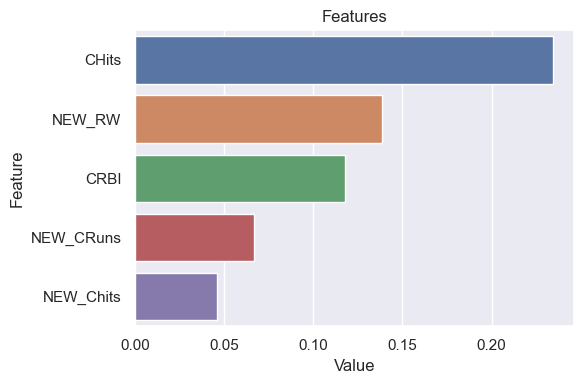

In [59]:
plot_importance(gbm_final, X, num = 5)

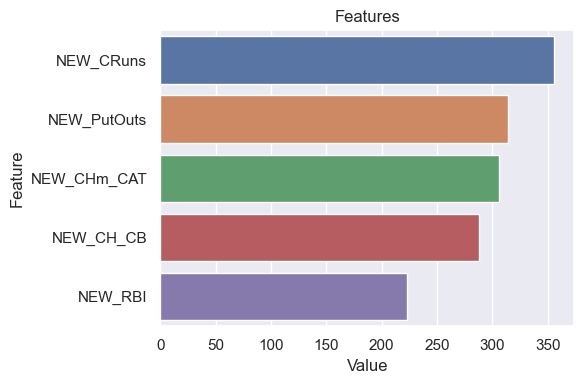

In [60]:
plot_importance(lgbm_final, X, num = 5)

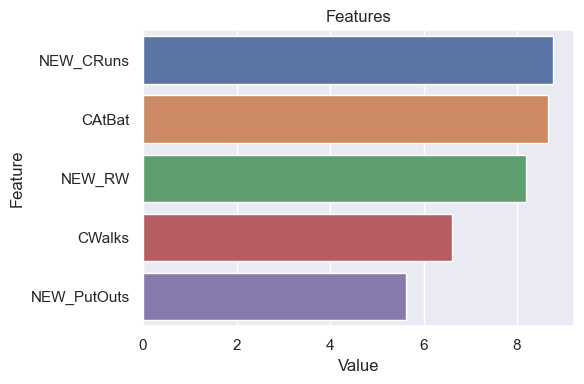

In [61]:
plot_importance(catboost_final, X, num = 5)

In [62]:
# Analyzing Model Complexity with Learning Curves

In [63]:
def val_curve_params(model, X, y, param_name, param_range, scoring = "roc_auc", cv = 10):
    train_score, test_score = validation_curve(
        model, X = X, y = y, param_name = param_name, param_range = param_range, scoring = scoring, cv = cv)

    mean_train_score = np.mean(train_score, axis = 1)
    mean_test_score = np.mean(test_score, axis = 1)

    plt.plot(param_range, mean_train_score,
             label = "Training Score", color = 'b')

    plt.plot(param_range, mean_test_score,
             label = "Validation Score", color = 'g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.show()

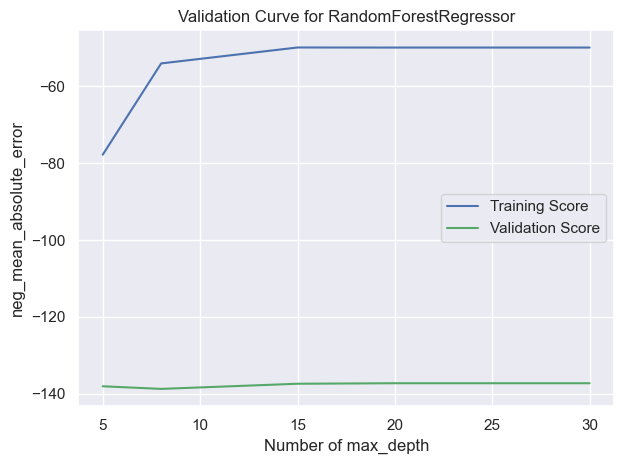

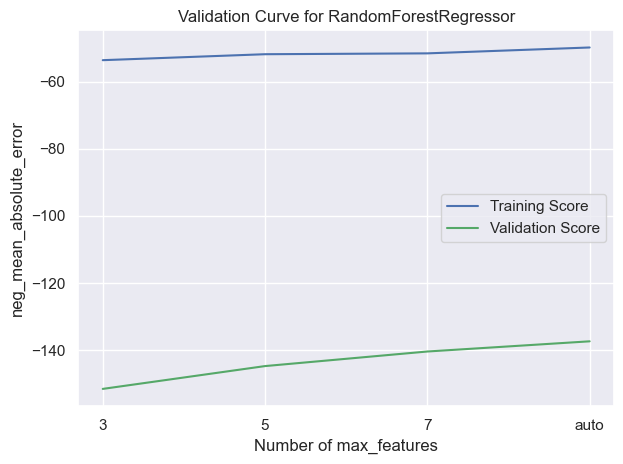

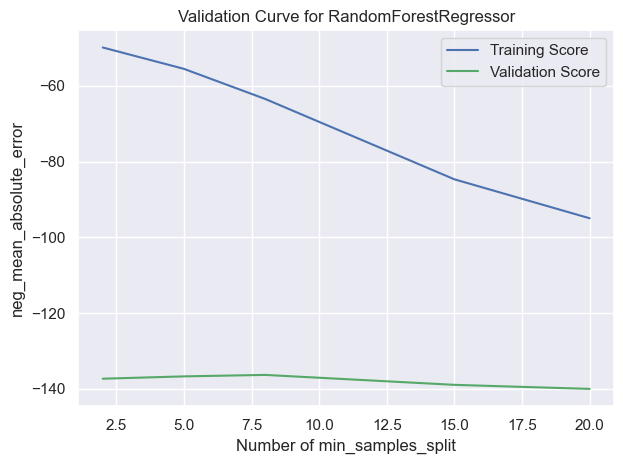

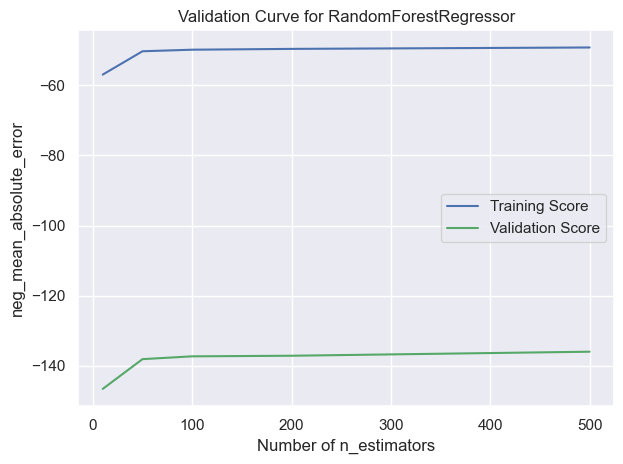

[5, 8, 15, 20, 30, None]

In [64]:
rf_val_params = [["max_depth", [5, 8, 15, 20, 30, None]],
                 ["max_features", [3, 5, 7, "auto"]],
                 ["min_samples_split", [2, 5, 8, 15, 20]],
                 ["n_estimators", [10, 50, 100, 200, 500]]]


rf_model = RandomForestRegressor(random_state = 17)

for i in range(len(rf_val_params)):
    val_curve_params(rf_model, X, y, rf_val_params[i][0], rf_val_params[i][1],scoring = "neg_mean_absolute_error")

rf_val_params[0][1]